# Project 3 : Customer Segmentation with Clustering Techniques


### 1. Varad Khot         -  242262008
### 2. Toshi Tiwari       -  242262019
### 3. Ashish Thigale  -  242262018

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### About Dataset
- This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

- Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 66A3-C284

 Directory of C:\Users\hp\PGDDSAI - Advanced ML (T2)\Project

14-05-2023  16:15    <DIR>          .
13-05-2023  17:06    <DIR>          ..
13-05-2023  17:13    <DIR>          .ipynb_checkpoints
13-05-2023  17:15           902,879 CC GENERAL.csv
14-05-2023  16:15         2,986,232 Clustering Technique Implementation.ipynb
               2 File(s)      3,889,111 bytes
               3 Dir(s)  104,389,574,656 bytes free


In [3]:
df = pd.read_csv('CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.shape

(8950, 18)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Data Cleaning 

In [7]:
df.drop('CUST_ID',axis=1,inplace=True)

- Check for missing values

In [8]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- Replacing Null values with Mean values

In [9]:
df.fillna(df.mean(),inplace=True)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [11]:
df.duplicated().sum()

0

### Visualizations

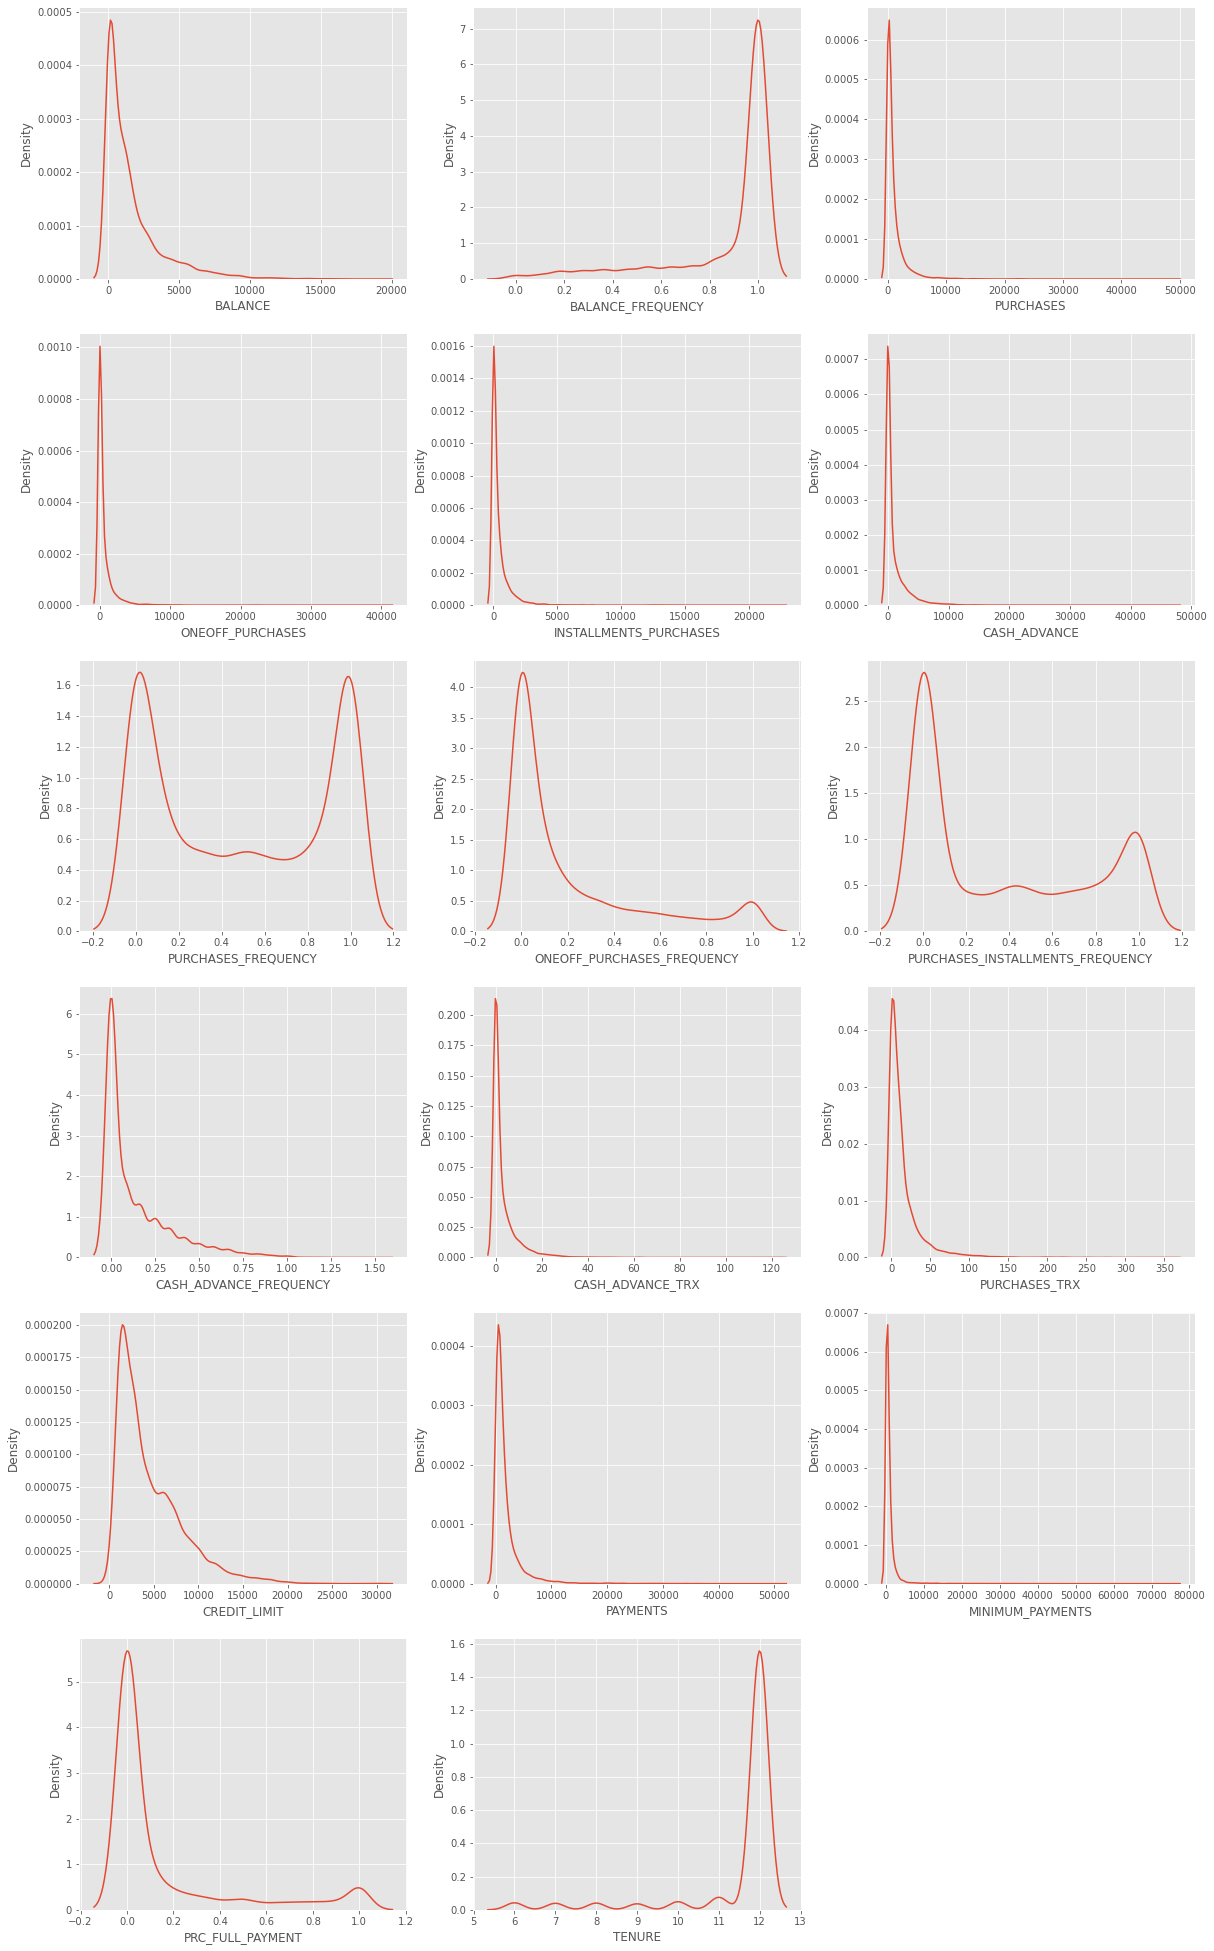

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(6, 3, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

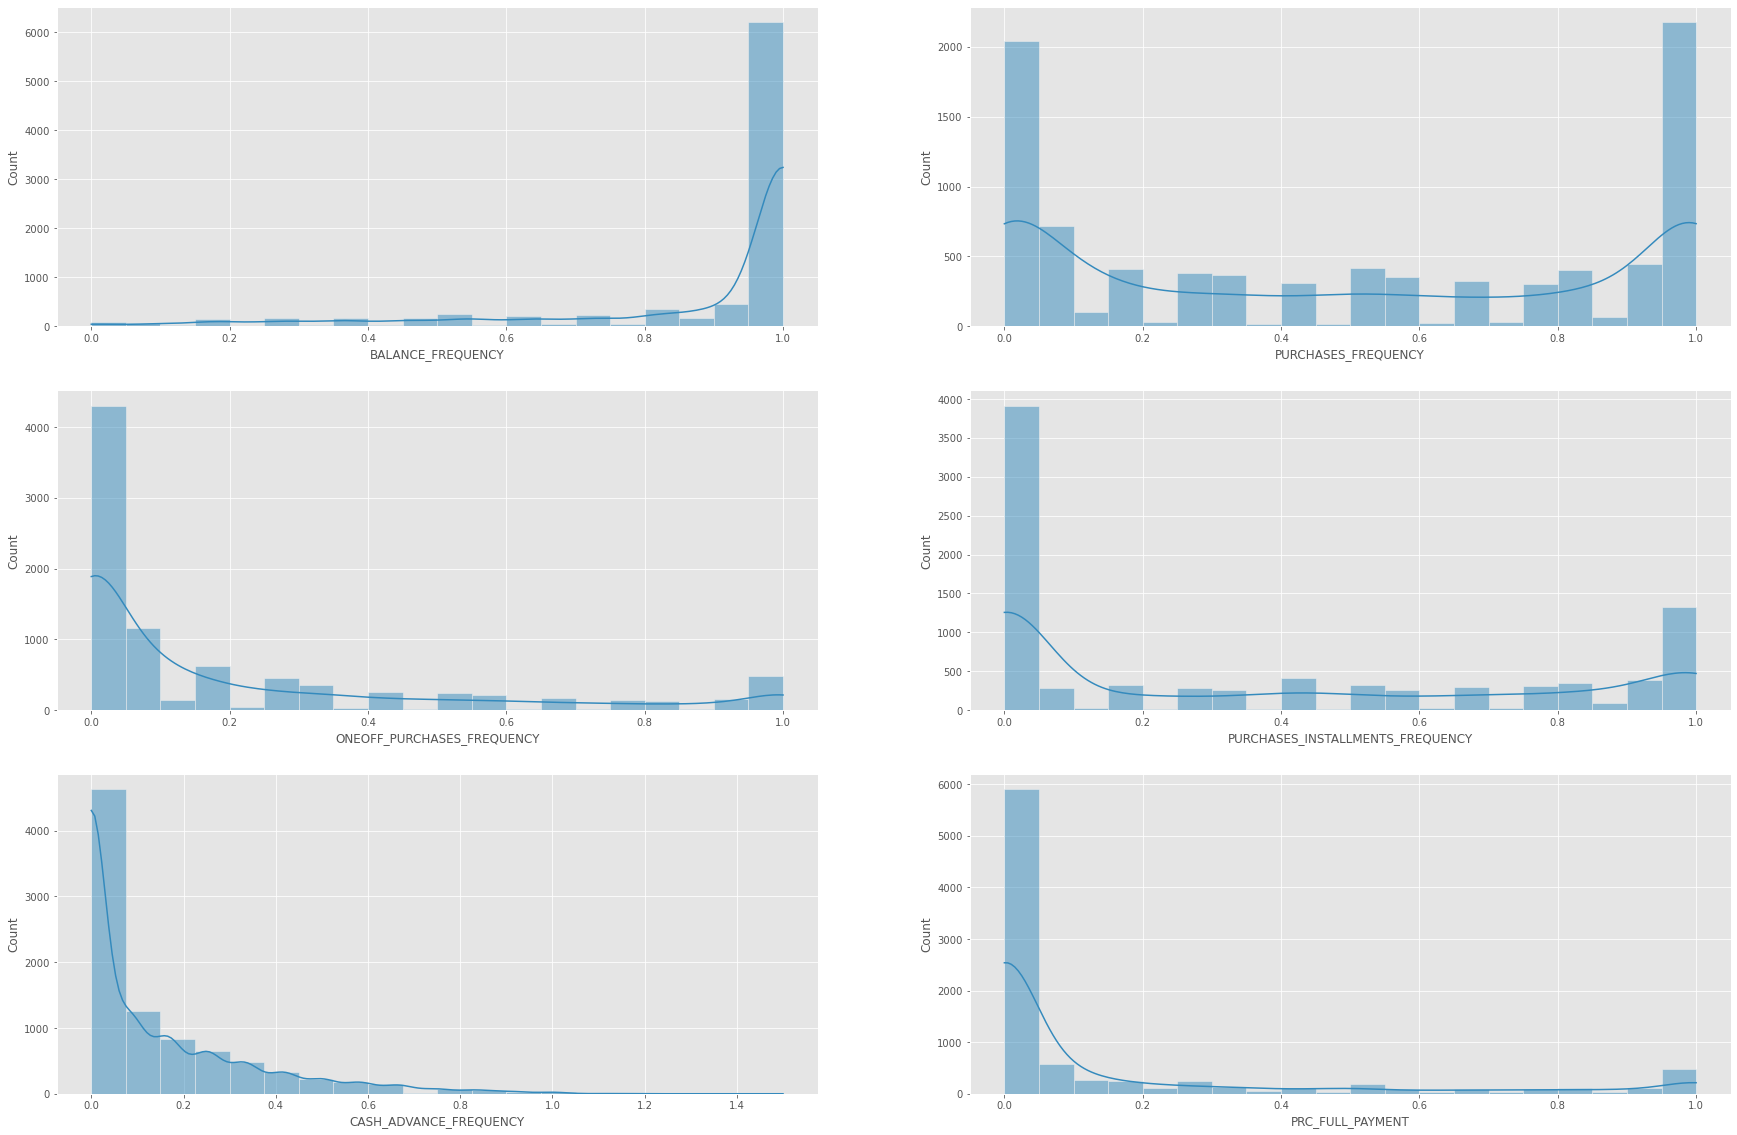

In [13]:
Freq_Cols = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 
             'PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']

plt.figure(figsize=(30,20))

for i, col in enumerate(df[Freq_Cols]):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(df[col] , ax=ax , kde=True, bins=20)
    plt.xlabel(col)
        
plt.show()

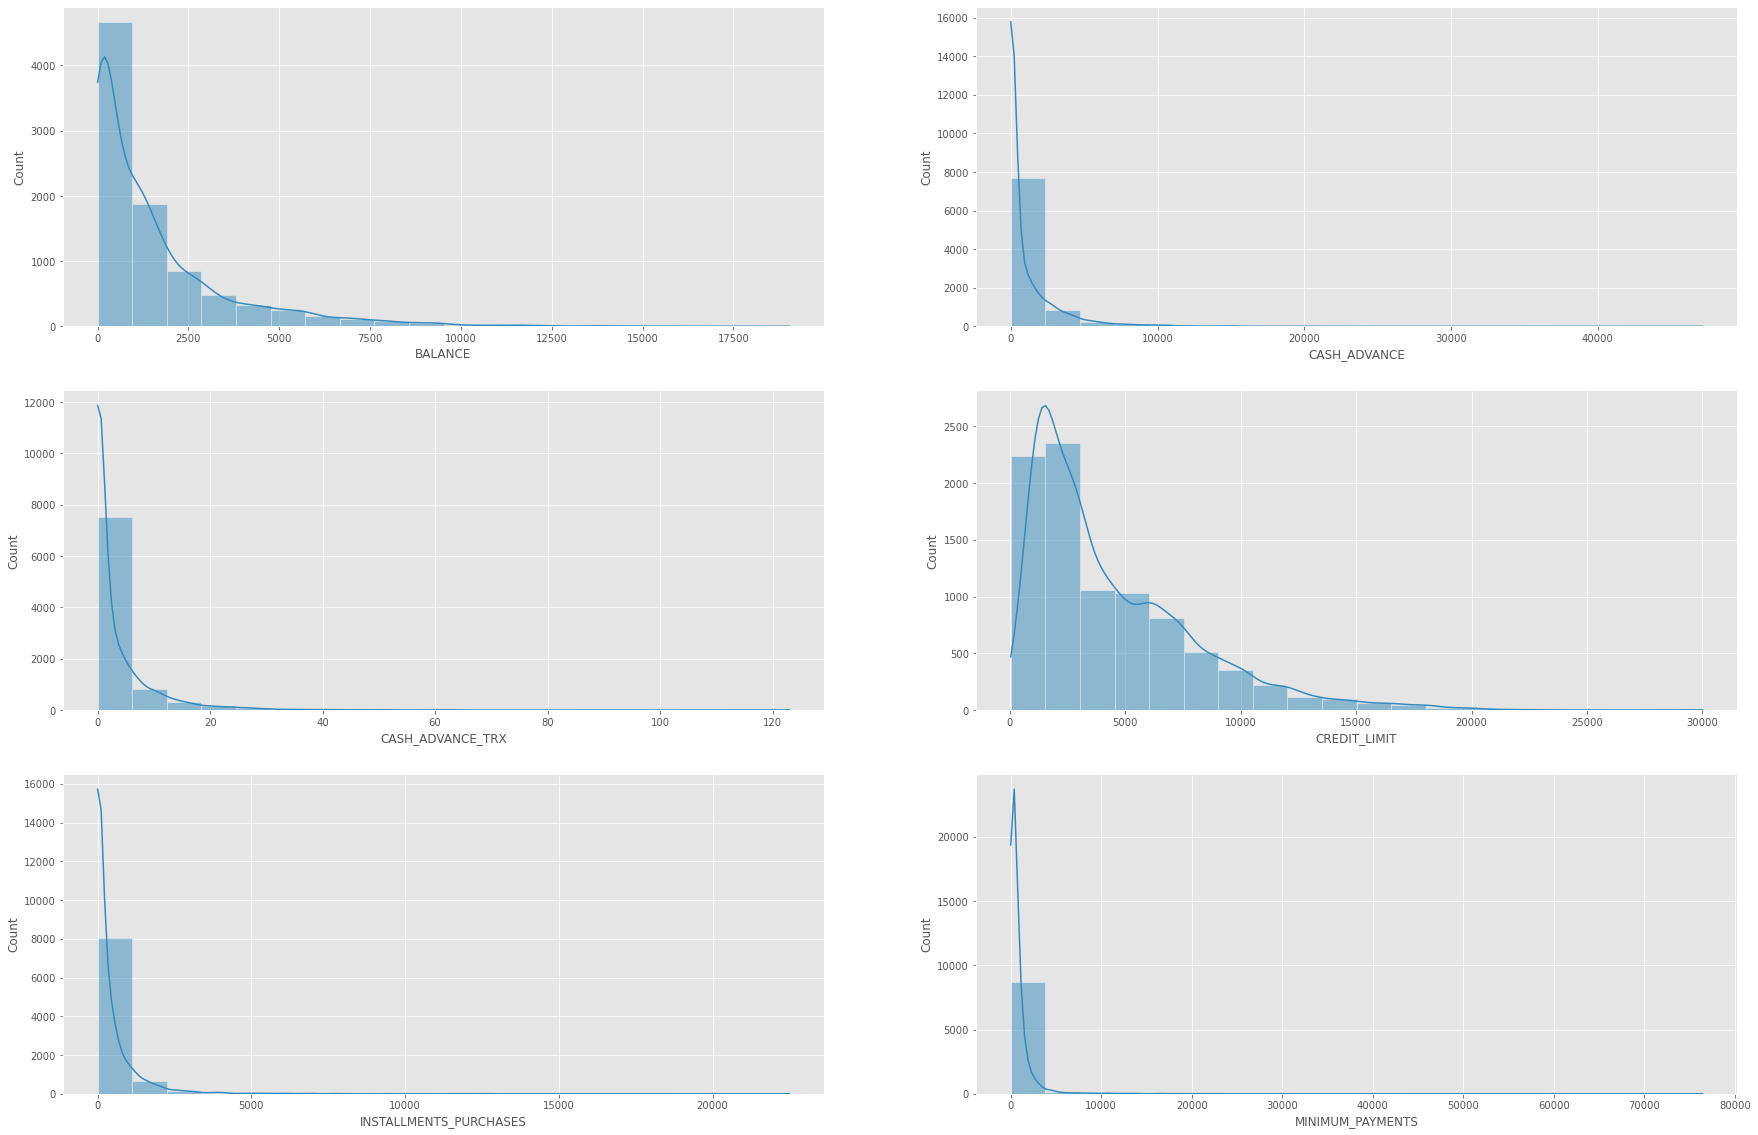

In [14]:
plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns.difference(Freq_Cols)[:6]):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(df[col] , ax=ax , kde=True, bins=20)
    plt.xlabel(col)
        
plt.show()

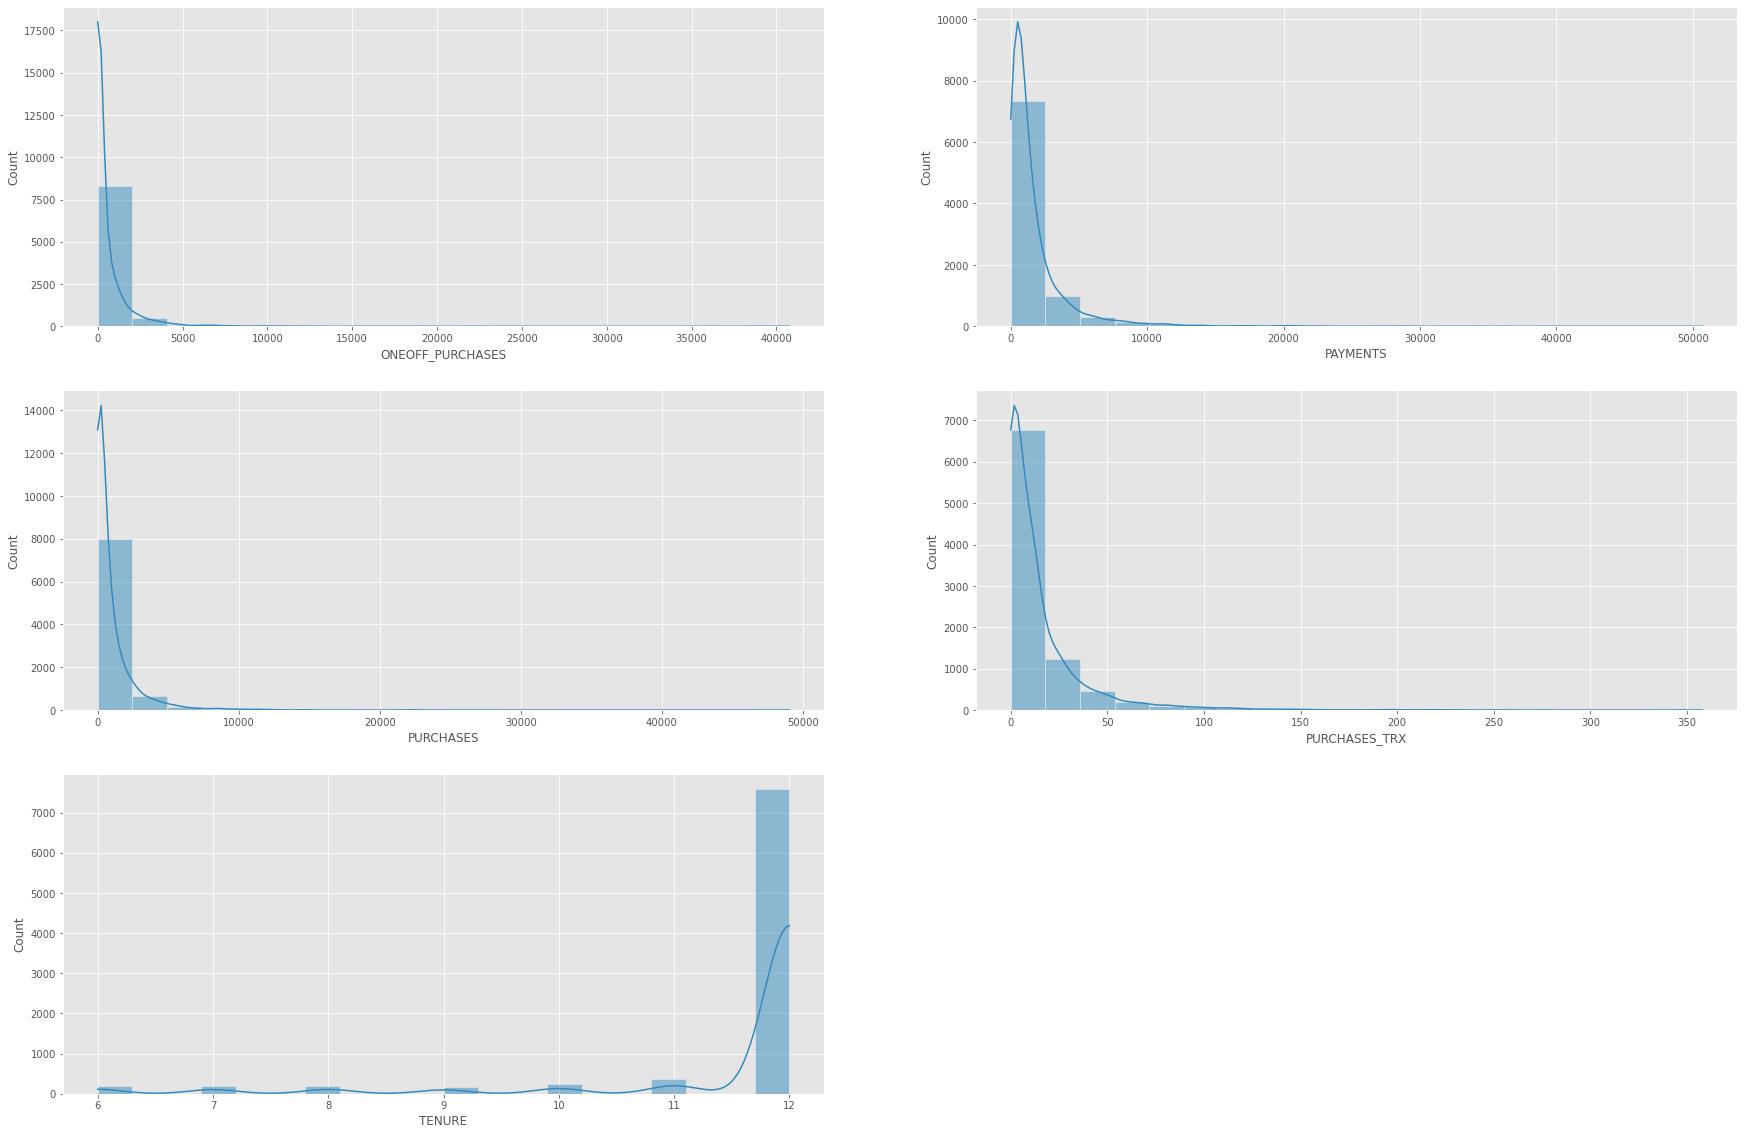

In [15]:
plt.figure(figsize=(30,20))
for i, col in enumerate(df.columns.difference(Freq_Cols)[6:]):
    ax = plt.subplot(3, 2, i+1)
    sns.histplot(df[col] , ax=ax , kde=True, bins=20)
    plt.xlabel(col)
        
plt.show()

<AxesSubplot:>

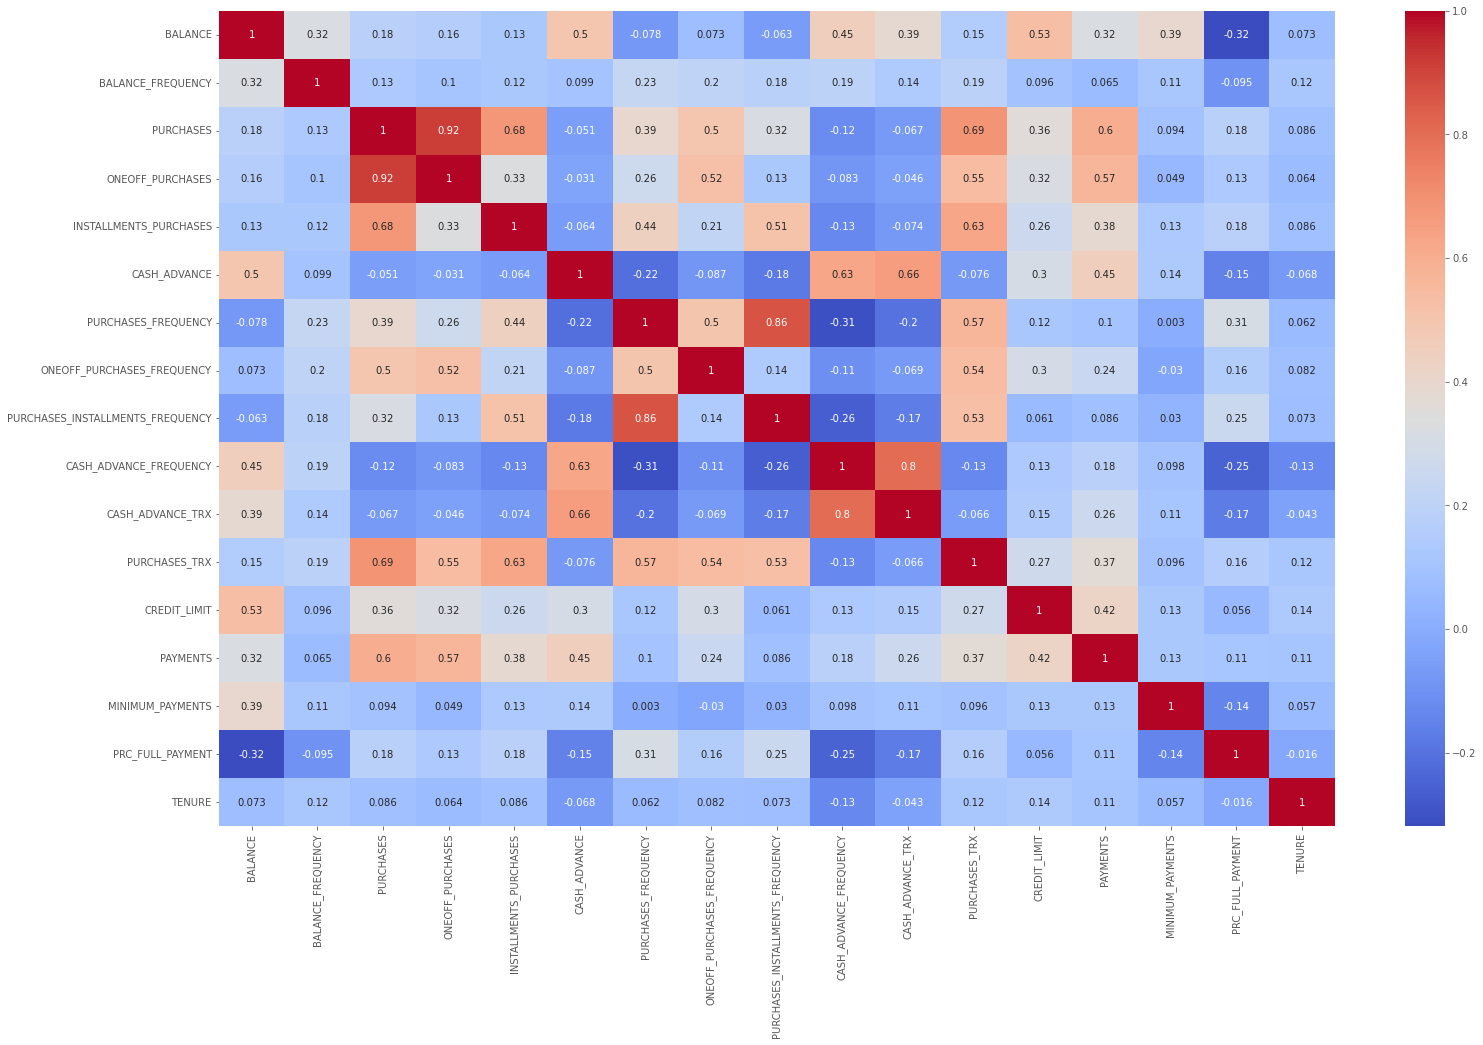

In [16]:
plt.figure(figsize=(25,15))
sns.heatmap( df.corr(), annot=True, cmap='coolwarm')

### Conclusion 
- We have many Corralated Features as Most of them are just another way to represent existing ones like the frequency features.
- One way to handle this is Dimensionality Reduction with PCA

### Removing Outliers

In [17]:
for col in df.columns:
    data = df[col]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    min = Q1 - (1.5 * IQR)
    max = Q3 + (1.5 * IQR)
    outliers = ( (data < min) | (data > max) )
    df.loc[outliers, col] = np.nan
    
    
df.isna().sum()

BALANCE                              695
BALANCE_FREQUENCY                   1493
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     774
PRC_FULL_PAYMENT                    1474
TENURE                              1366
dtype: int64

In [18]:
from sklearn.impute import KNNImputer

# Each sample’s missing values are imputed using the mean value

In [19]:
imputer = KNNImputer()
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1245.516658,1286.743982,0.000000,128.281915,868.992347,1967.200467,4940.113918
BALANCE_FREQUENCY,8950.0,0.977885,0.060310,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,612.139037,672.211682,0.000000,39.550000,360.000000,1023.485000,2711.900000
ONEOFF_PURCHASES,8950.0,230.344903,344.952702,0.000000,0.000000,27.365000,357.342000,1443.330000
INSTALLMENTS_PURCHASES,8950.0,224.867341,285.428491,0.000000,0.000000,89.000000,376.515000,1170.490000
CASH_ADVANCE,8950.0,452.612755,698.080556,0.000000,0.000000,0.000000,830.616555,2784.294727
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.169295,0.227378,0.000000,0.000000,0.083333,0.266667,0.750000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.105121,0.140691,0.000000,0.000000,0.000000,0.166667,0.545455


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

### Applying Log Transformation to handle the Skewness

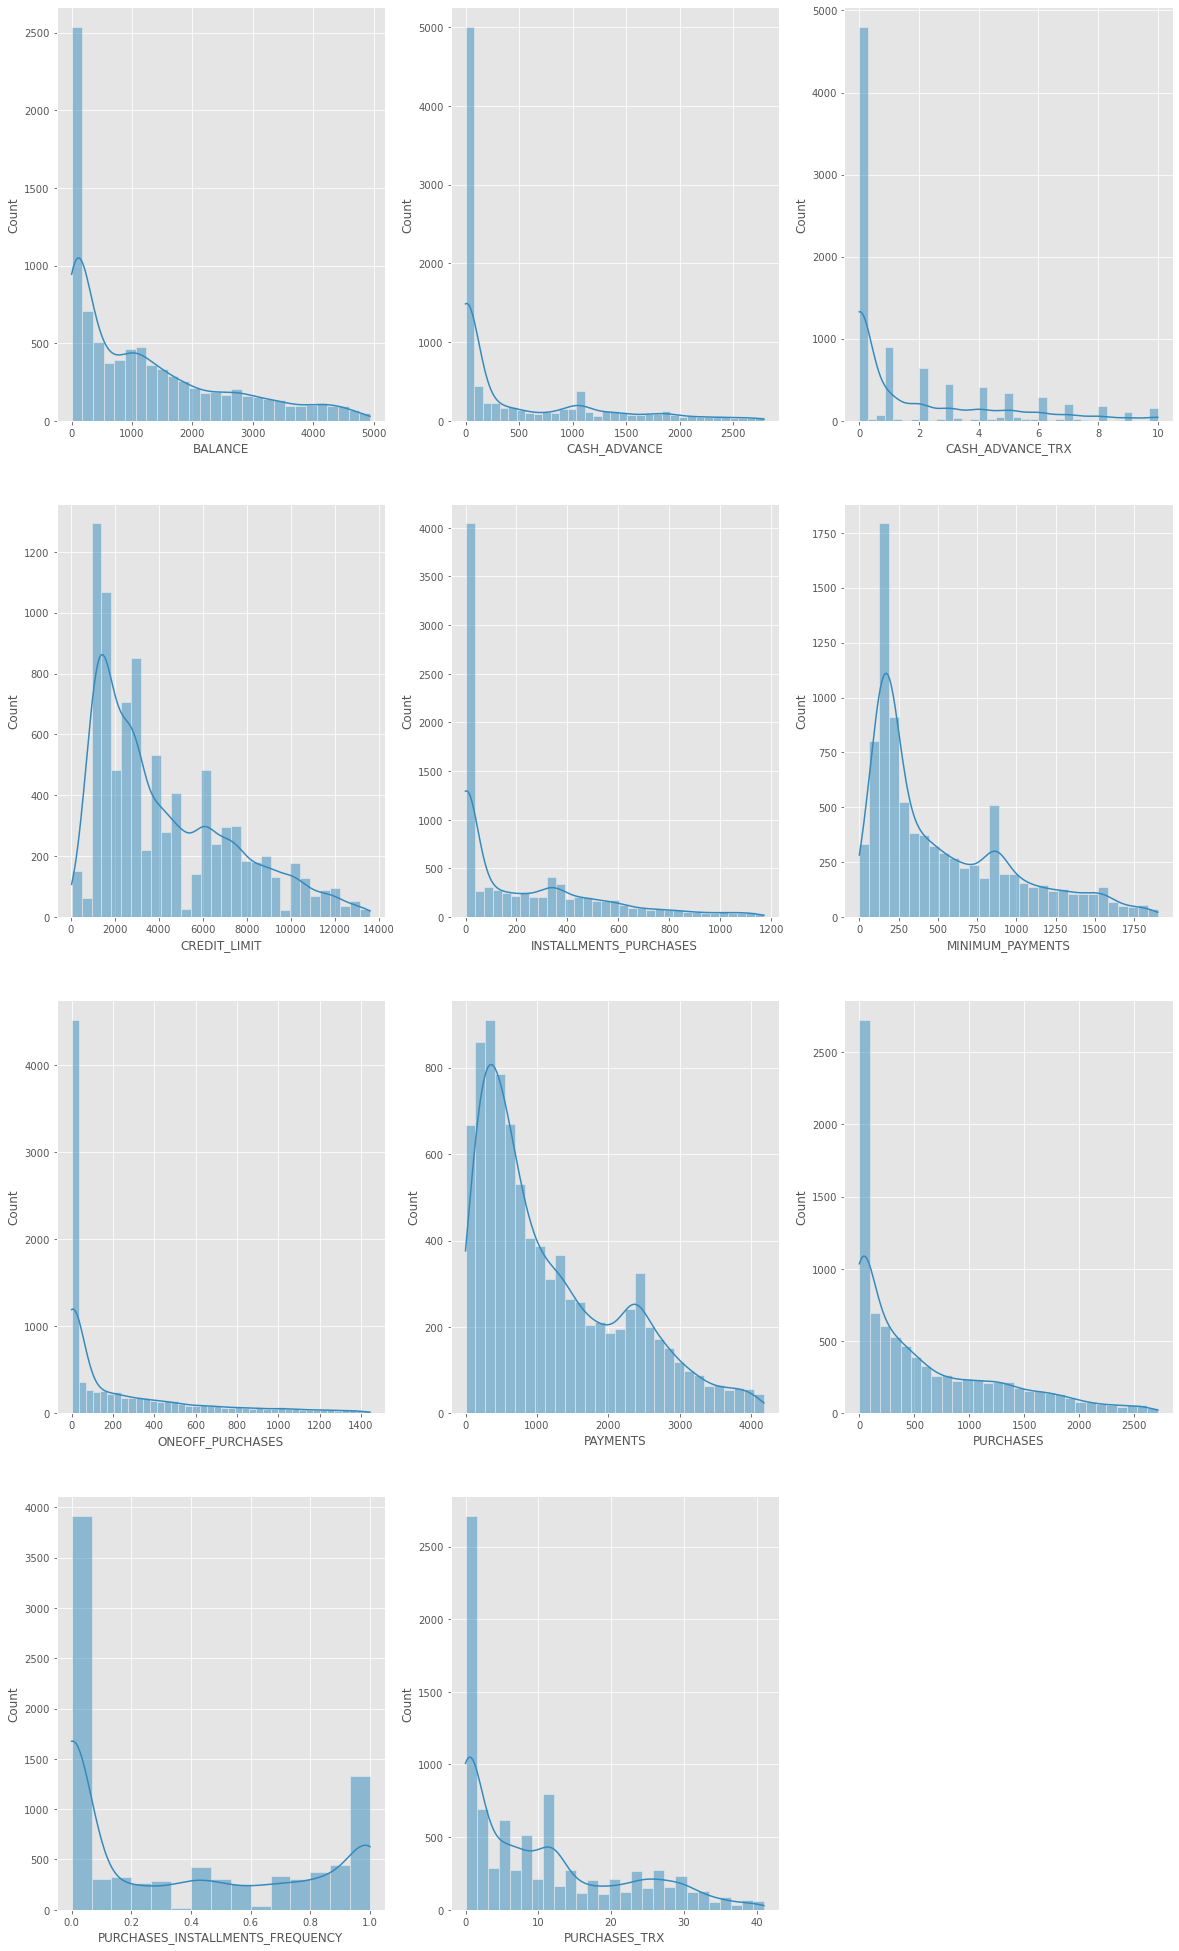

In [22]:
Skewed_Cols = df.columns.difference(['BALANCE_FREQUENCY',
                'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
                'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT', 'TENURE'])
plt.figure(figsize=(20,35))
for i, col in enumerate(df[Skewed_Cols]):
    ax = plt.subplot(4, 3, i+1)
    sns.histplot(df[col] , ax=ax , kde=True)
    plt.xlabel(col)
plt.show()

In [23]:
trans_df = df.copy()
for col in Skewed_Cols:
    trans_df[col] = np.log(1 + trans_df[col])

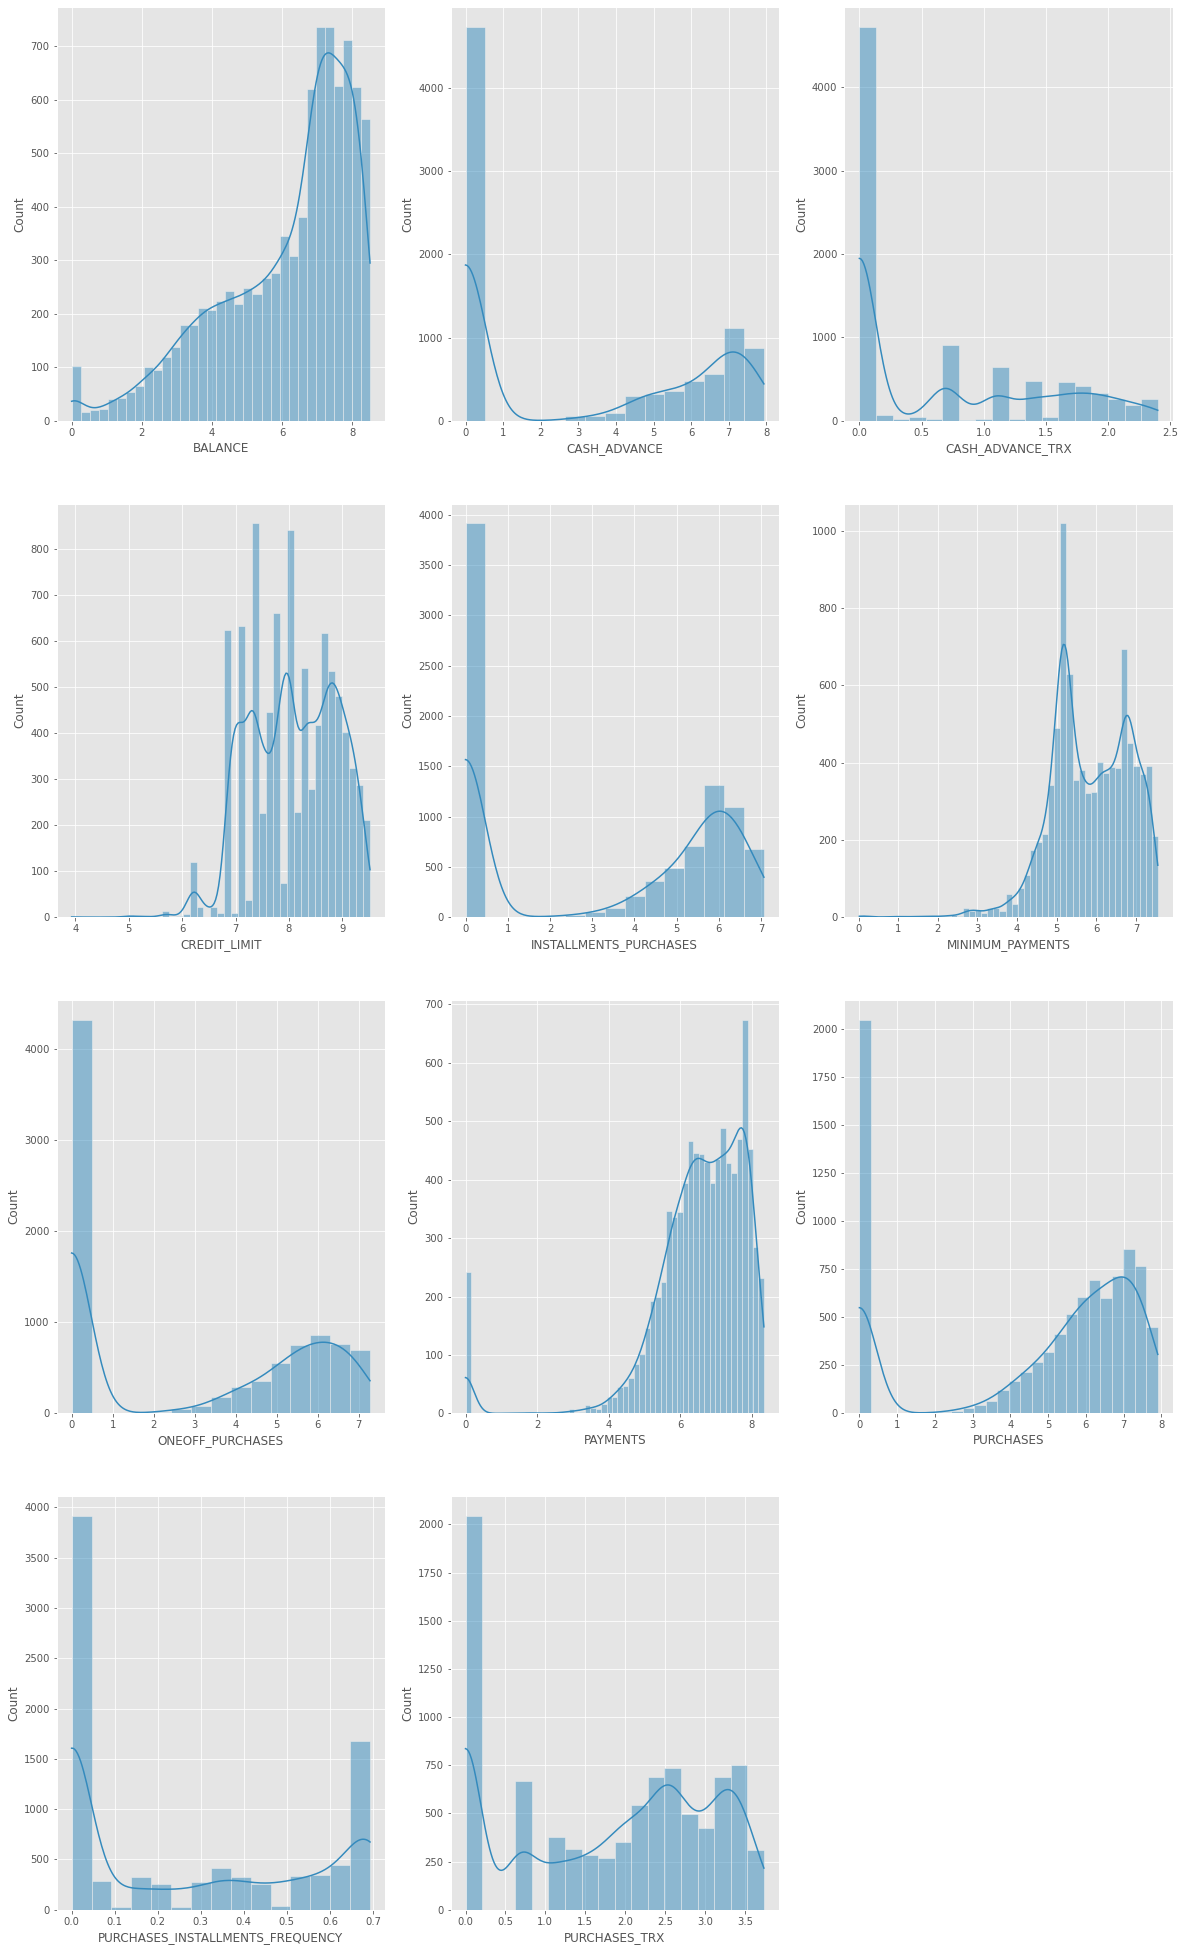

In [24]:
plt.figure(figsize=(20,35))

for i, col in enumerate(trans_df[Skewed_Cols]):
    ax = plt.subplot(4, 3, i+1)
    sns.histplot(trans_df[col] , ax=ax , kde=True)
    plt.xlabel(col)
        
plt.show()

### Scaling Features

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
Scaler = StandardScaler()
df_scaled = Scaler.fit_transform(trans_df)

In [28]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,2.232913e-16,1.000056,-3.146088,-0.635667,0.348721,0.770252,1.245524
BALANCE_FREQUENCY,8950.0,3.173811e-16,1.000056,-4.155617,0.366700,0.366700,0.366700,0.366700
PURCHASES,8950.0,4.992530e-16,1.000056,-1.713027,-0.385505,0.398395,0.772381,1.121541
ONEOFF_PURCHASES,8950.0,4.174935e-15,1.000056,-0.996324,-0.996324,0.144257,1.009065,1.484342
INSTALLMENTS_PURCHASES,8950.0,-2.712169e-16,1.000056,-1.103641,-1.103641,0.448063,0.942492,1.332993
CASH_ADVANCE,8950.0,-9.184211e-16,1.000056,-0.916649,-0.916649,-0.916649,1.126136,1.493390
PURCHASES_FREQUENCY,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211,1.269843
ONEOFF_PURCHASES_FREQUENCY,8950.0,-3.709857e-15,1.000056,-0.744592,-0.744592,-0.378076,0.428262,2.554059
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,-2.339283e-15,1.000056,-0.958256,-0.958256,-0.411304,1.027349,1.501139
CASH_ADVANCE_FREQUENCY,8950.0,-3.664356e-16,1.000056,-0.747224,-0.747224,-0.747224,0.437478,3.129977


### Dimensionality Reduction with PCA

In [29]:
from sklearn.decomposition import PCA

### PCA 

In [30]:
pca = PCA()

X_pca = pca.fit_transform(df_scaled)

In [31]:
type(pca)

sklearn.decomposition._pca.PCA

In [32]:
X_pca.shape

(8950, 17)

- First, We will Make Components to all features in the data.

- Then decide how many components are needed based on the cumulative explained variance by the components

In [33]:
# Convert to DataFrame

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,0.076886,3.157070,-0.024590,0.639733,0.268693,2.432711,-0.596484,0.171924,-0.189671,0.264578,0.079326,-0.573285,0.652548,-0.026013,0.062332,0.119719,0.0
1,3.653531,-0.949876,0.488258,2.512286,-1.994066,-0.206356,-0.620513,-1.508887,0.254545,0.160278,-0.078213,-0.035000,-0.184734,-0.116043,-0.009693,0.024441,-0.0
2,-1.534629,-1.462695,-2.741621,-0.787043,-0.160569,-0.078359,-0.017373,-0.497192,1.094763,0.110327,0.258617,0.898036,0.147873,-0.089457,0.115917,0.575308,0.0
3,1.545118,0.475723,-1.563098,-1.920448,1.425831,0.740972,1.864732,-3.095544,-1.022897,-1.273902,0.120935,0.648195,0.501350,0.314017,0.703310,-0.182691,-0.0
4,1.073677,1.598876,-1.339126,-0.815842,-0.276800,-0.187673,-1.423309,0.481154,-0.043190,-0.254228,0.365758,0.034184,-0.155575,-0.093340,-0.044550,-0.056388,0.0


In [34]:
pca.explained_variance_ratio_

array([0.35723559, 0.18643761, 0.10150594, 0.07991828, 0.06048376,
       0.05668163, 0.04444262, 0.04113458, 0.02040818, 0.01323313,
       0.01164262, 0.00953611, 0.00830307, 0.00447765, 0.00255377,
       0.00200546, 0.        ])

In [35]:
pca.explained_variance_ratio_.max()

0.3572355937856371

In [36]:
pca.explained_variance_ratio_.min()

0.0

In [37]:
pca.explained_variance_ratio_.cumsum()

array([0.35723559, 0.5436732 , 0.64517914, 0.72509742, 0.78558118,
       0.84226281, 0.88670543, 0.92784001, 0.94824818, 0.96148131,
       0.97312393, 0.98266005, 0.99096312, 0.99544077, 0.99799454,
       1.        , 1.        ])

In [38]:
pca.n_components_

17

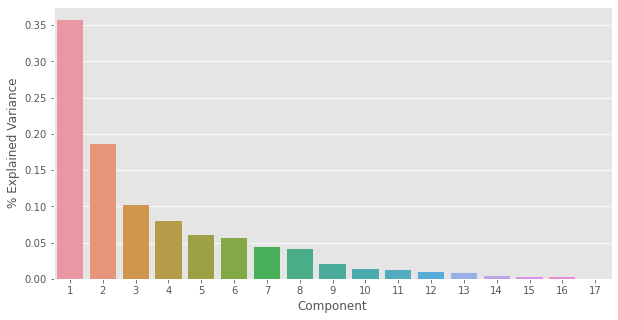

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(range(1,18,1)),y=pca.explained_variance_ratio_)
plt.xlabel('Component')
plt.ylabel('% Explained Variance')
plt.show()

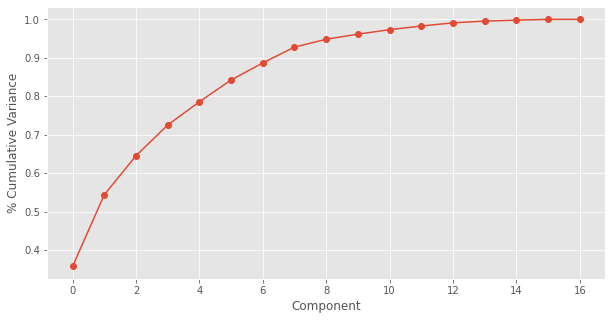

In [40]:
plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_.cumsum(),'-o')
plt.xlabel('Component')
plt.ylabel('% Cumulative Variance')
plt.show()

### Conclusion - About 90% of the variance in the data is explained by only 6 components.

In [41]:
pca = PCA(n_components = 6)

X_pca = pca.fit_transform(df_scaled)

# Convert to DataFrame

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]

X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,0.076886,3.157070,-0.024590,0.639733,0.268693,2.432711
1,3.653531,-0.949876,0.488258,2.512286,-1.994066,-0.206356
2,-1.534629,-1.462695,-2.741621,-0.787043,-0.160569,-0.078359
3,1.545118,0.475723,-1.563098,-1.920448,1.425831,0.740972
4,1.073677,1.598876,-1.339126,-0.815842,-0.276800,-0.187673


In [42]:
pca.explained_variance_ratio_

array([0.35723559, 0.18643761, 0.10150594, 0.07991828, 0.06048376,
       0.05668163])

In [43]:
pca.explained_variance_ratio_.cumsum()

array([0.35723559, 0.5436732 , 0.64517914, 0.72509742, 0.78558118,
       0.84226281])

In [44]:
X_pca.shape

(8950, 6)

In [45]:
X_pca[:][:].values

array([[ 0.07688556,  3.1570704 , -0.0245902 ,  0.63973332,  0.26869276,
         2.43271065],
       [ 3.65353121, -0.94987561,  0.48825787,  2.51228574, -1.99406643,
        -0.20635648],
       [-1.53462901, -1.46269473, -2.74162087, -0.7870426 , -0.16056921,
        -0.07835934],
       ...,
       [-1.59353431,  3.44844132,  1.43565814,  2.78144791,  0.43517675,
         0.6816655 ],
       [ 2.55299294,  4.04465763,  0.29166161,  3.55432601,  1.4606604 ,
         0.25847524],
       [-0.16451069, -0.64780815, -1.73267519,  0.45427038,  3.68300802,
        -0.52083878]])

# K-means Clustering

### 1. with PCA

In [46]:
from sklearn.cluster import KMeans

### Selecting best value of K

- wcss = within cluster sum of square

In [47]:
# ! pip install threadpoolctl==3.1.0

In [48]:
wcss = []
R = list(range(1,21))
for i in R:
    km = KMeans(n_clusters = i)
    km.fit(X_pca)
    wcss.append(km.inertia_)

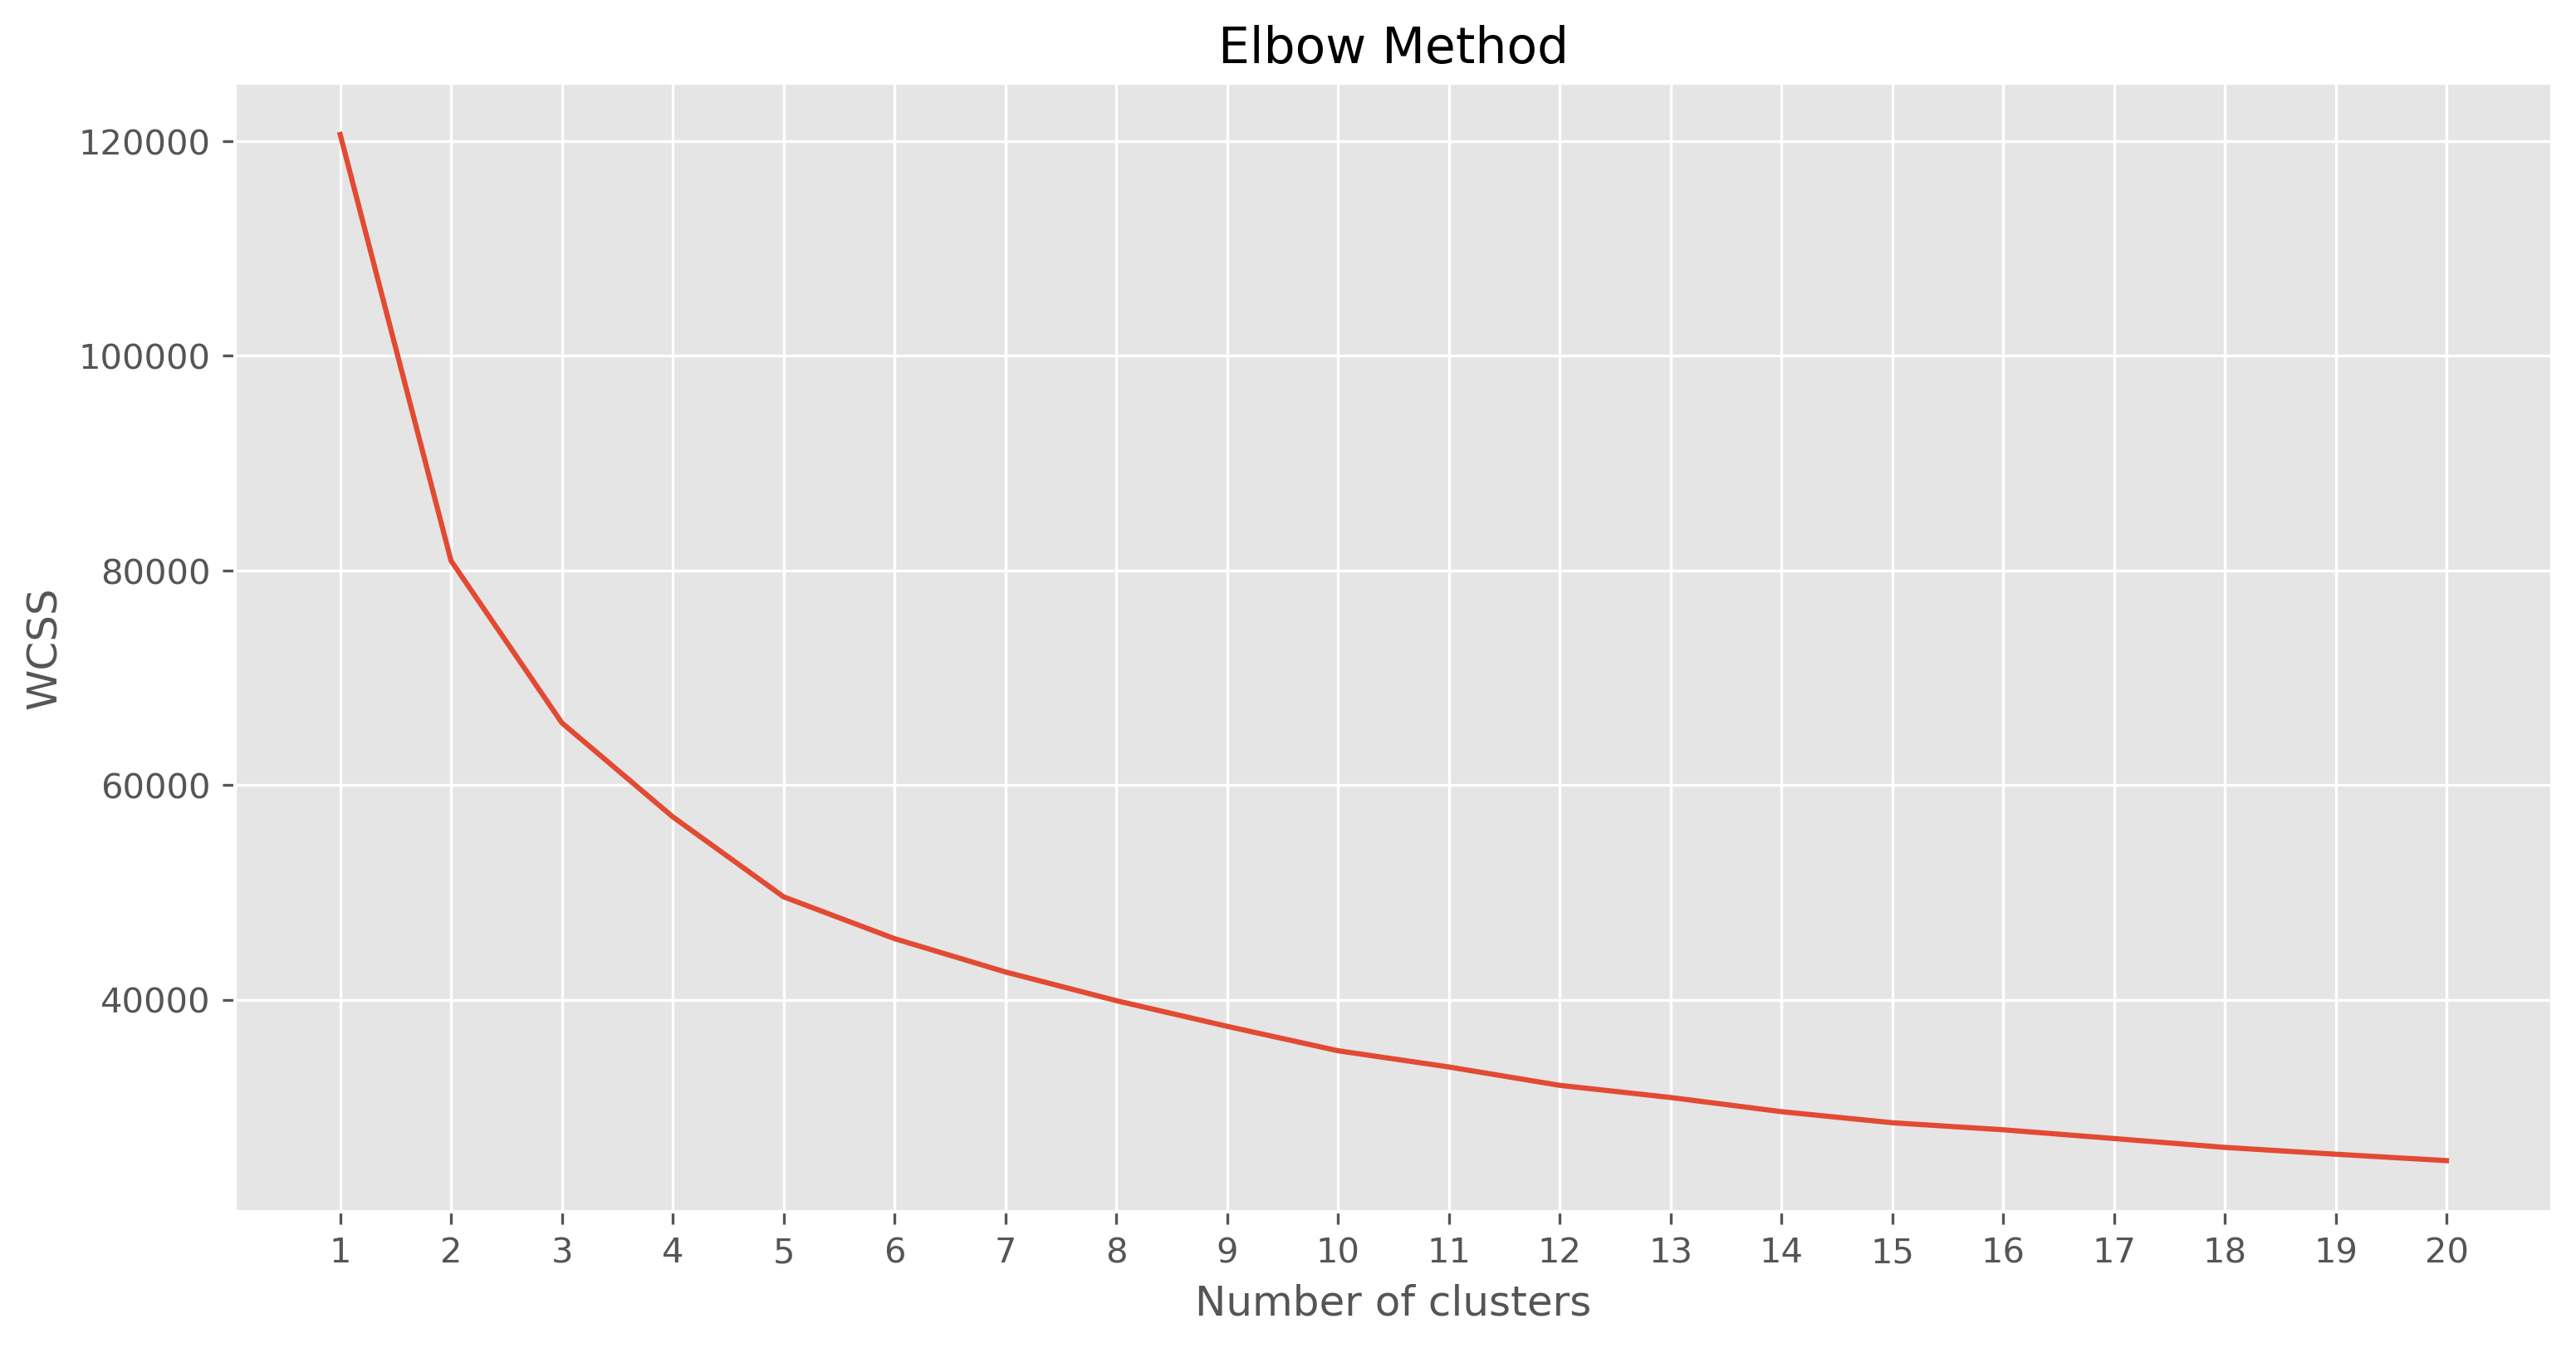

In [49]:
plt.figure(figsize = (12,6), dpi = 300)
sns.lineplot(x = R, y=wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1,21))
plt.show()

- The elbow(change in rate of reduction of WCSS) is present at 3
- Hence the best value of k(number of clusters) is 3

In [50]:
km_best = KMeans(n_clusters = 3)
km_best.fit(X_pca)

KMeans(n_clusters=3)

In [51]:
pca_labels = km_best.fit_predict(X_pca)

In [52]:
pca_labels.shape

(8950,)

In [53]:
pca_labels[:10]

array([2, 1, 0, 1, 2, 2, 0, 2, 0, 2])

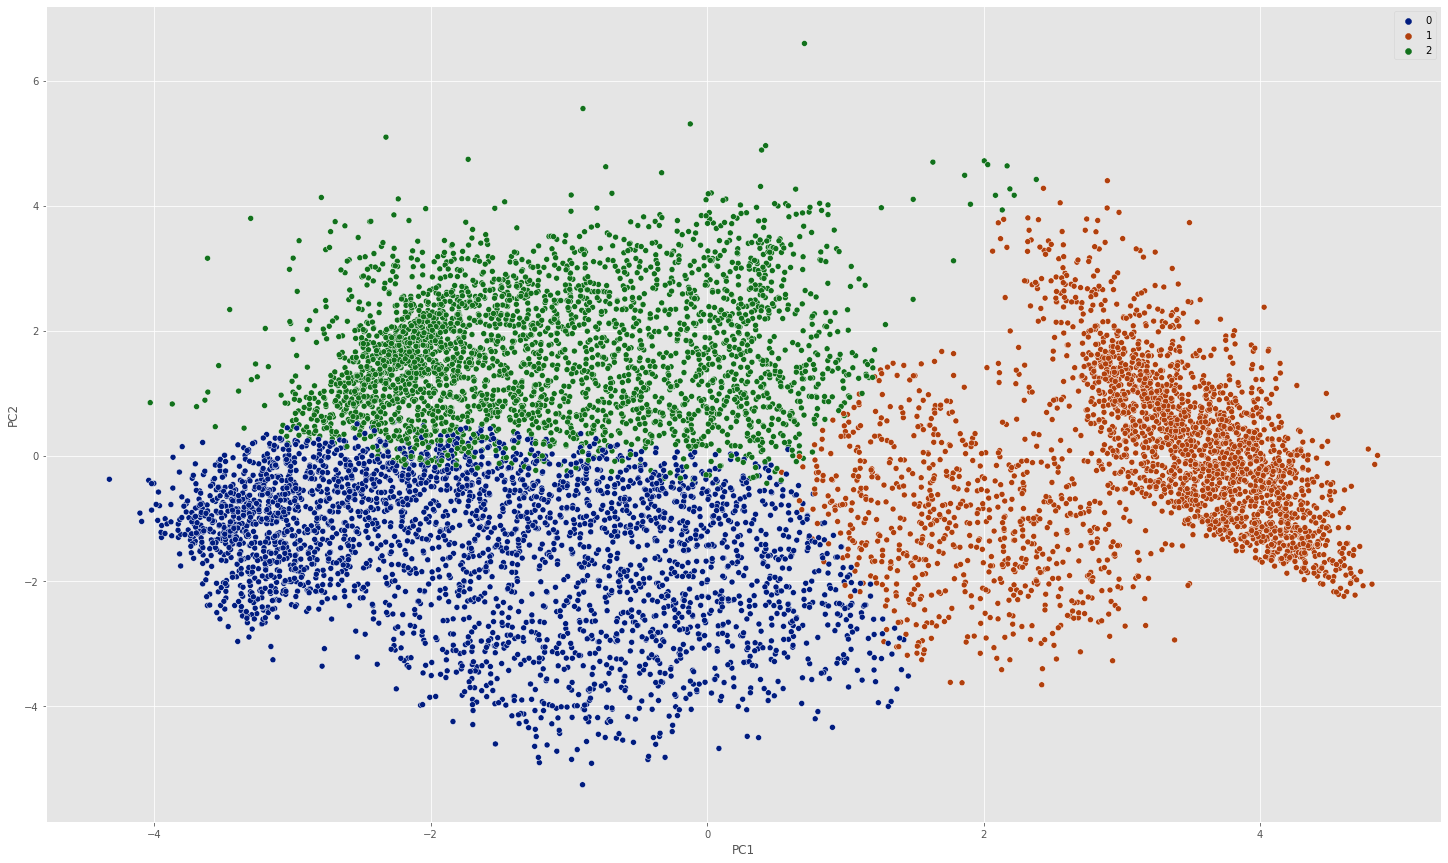

In [54]:
plt.figure(figsize=(25,15))
sns.scatterplot(x= X_pca["PC1"], y= X_pca["PC2"], hue = pca_labels, data = X_pca, palette='dark')
plt.show()

In [55]:
centroids = km_best.cluster_centers_
centroids

array([[-1.63865754, -1.4691159 , -0.23499625,  0.01361959,  0.12668682,
        -0.03427568],
       [ 3.12752054, -0.11040892,  0.0758684 ,  0.07432457, -0.08221362,
        -0.03001673],
       [-1.14773259,  1.63047569,  0.17545777, -0.08200569, -0.05688986,
         0.0630812 ]])

### Clusters Analysis

In [56]:
scaled_labels = km_best.fit_predict(df_scaled)

In [57]:
scaled_labels.shape

(8950,)

In [58]:
df['Clusters'] = scaled_labels
df['Clusters'] = df['Clusters'].astype('category')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2
1,3202.467416,0.909091,0.00,0.00,0.0,1068.127248,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,0.650000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,1
3,1666.670542,0.981818,1499.00,166.86,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,864.206542,0.000000,12.0,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,2


In [59]:
df['Clusters'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

In [60]:
len(df.columns)

18

<Figure size 1440x2520 with 0 Axes>

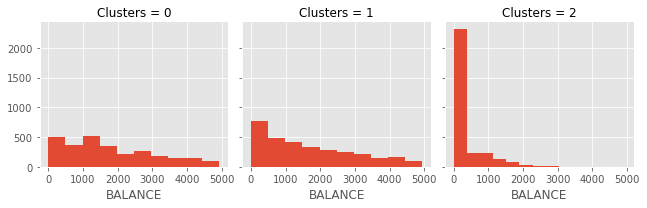

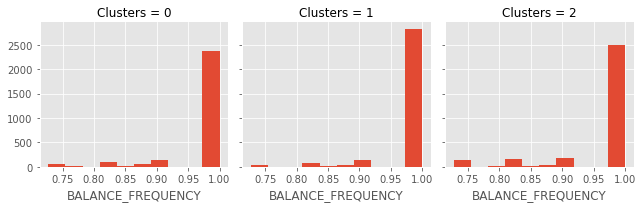

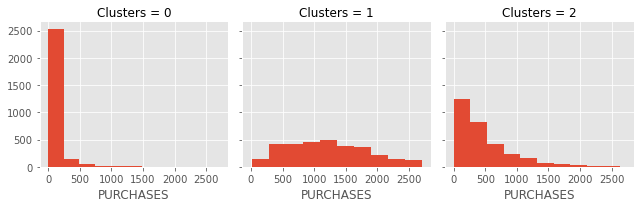

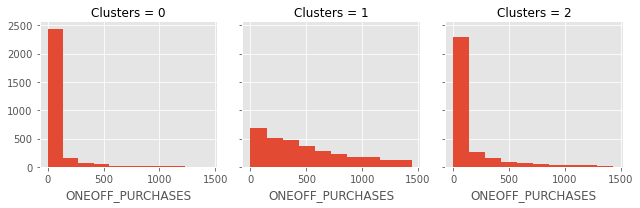

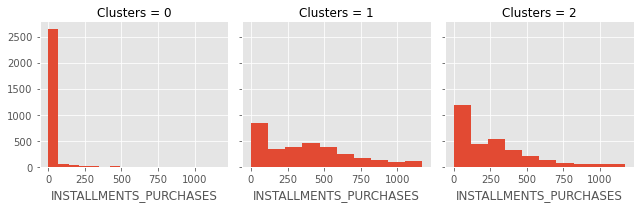

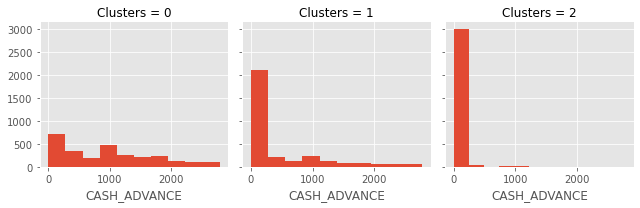

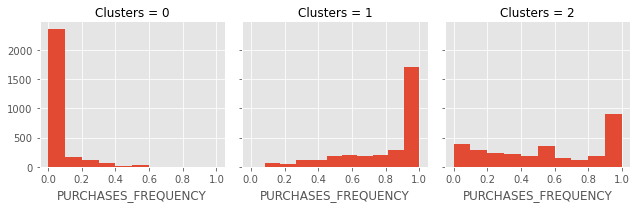

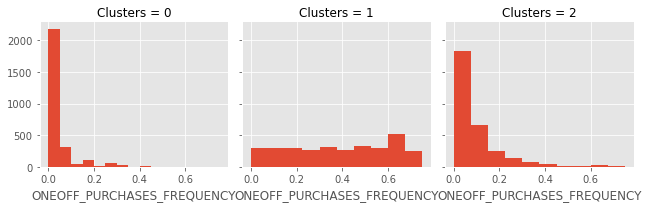

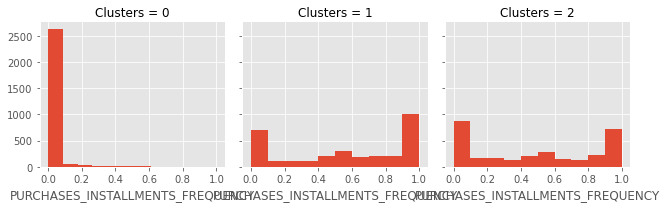

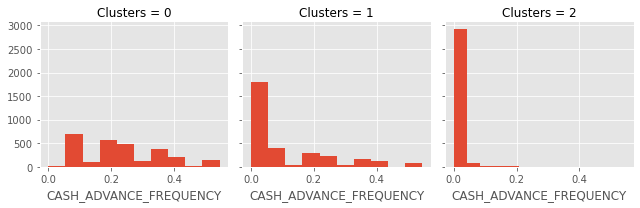

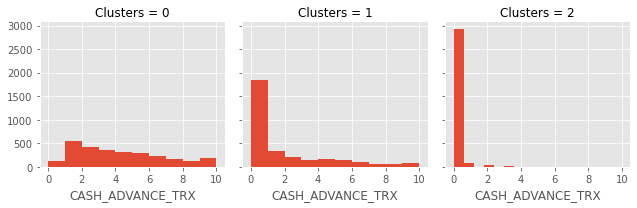

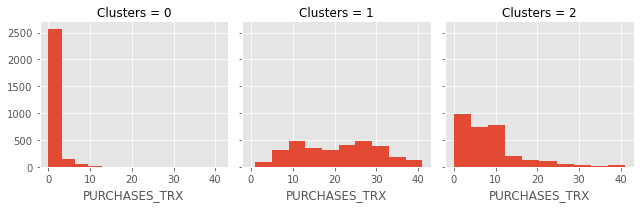

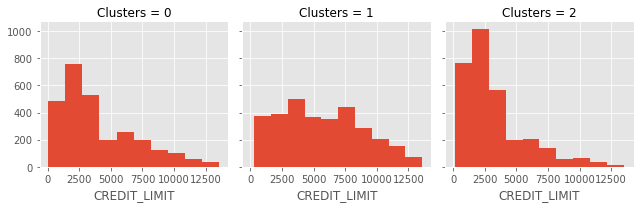

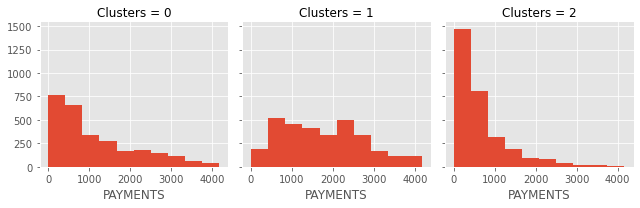

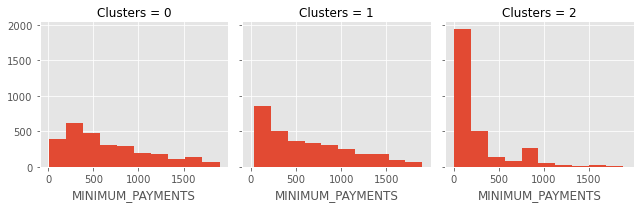

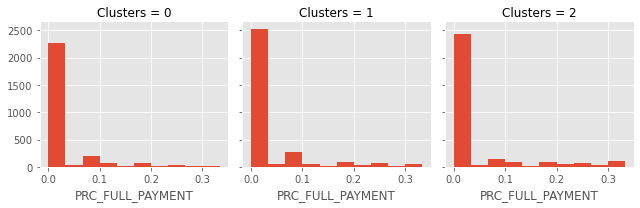

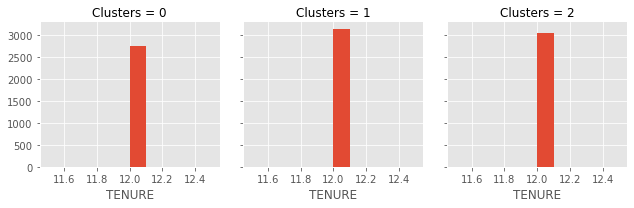

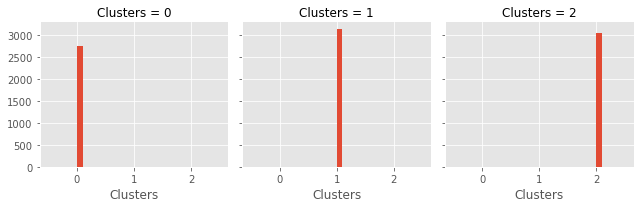

In [61]:
plt.figure(figsize=(20,35))

for col in df.columns:
    grid = sns.FacetGrid(df, col='Clusters')
    grid.map(plt.hist, col)
    plt.show()

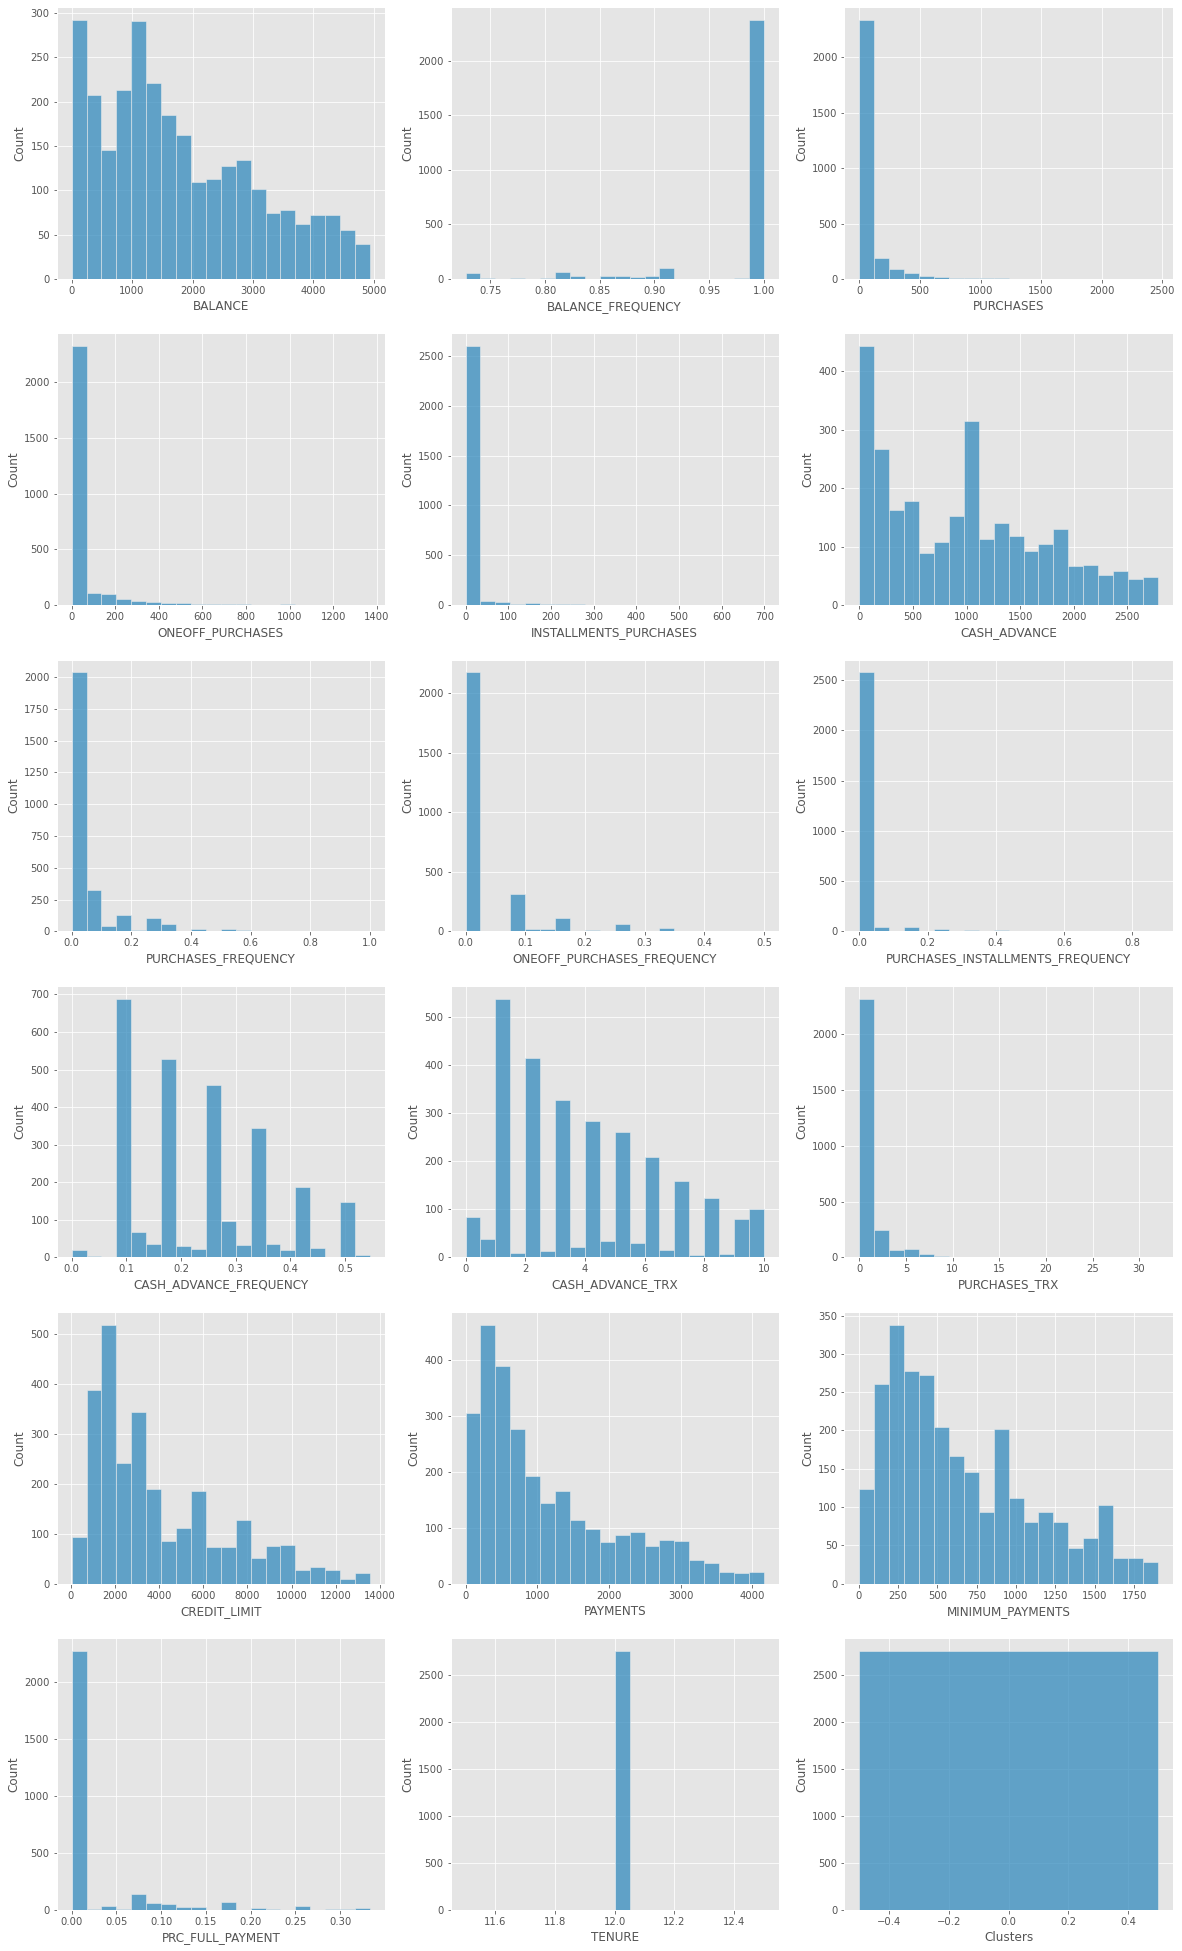

In [62]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 0])
        plt.xlabel(col)
plt.show()

- Cluster 0 :

    - Customers with Lower balance But Update their Balance Frequently.

    - May Make Installment Purchases and doesn't Prefer Paying in Advance.

    - Purchase Frequently with Low Payments and they have a Low Credit Limit.

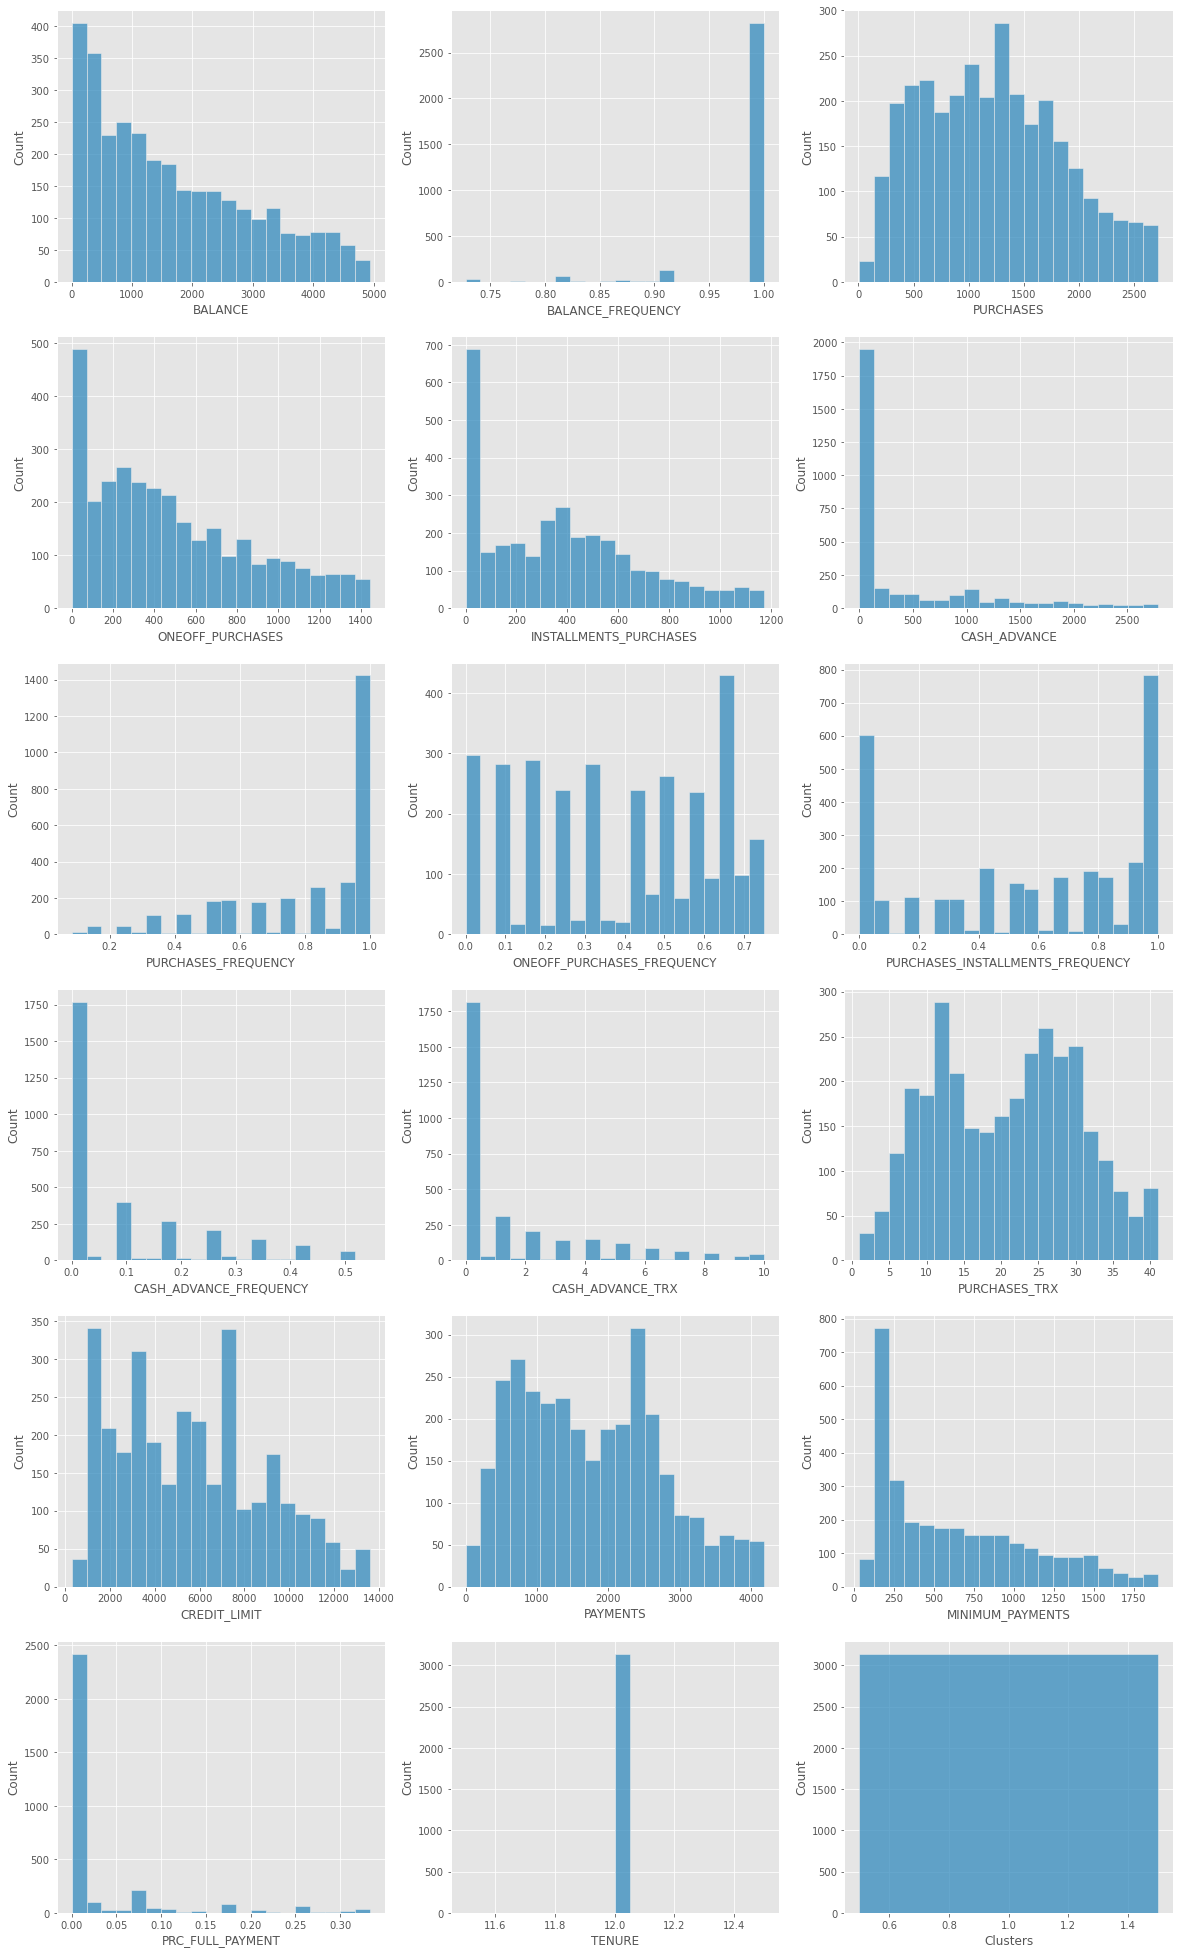

In [63]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 1])
        plt.xlabel(col)
plt.show()

- Cluster 1 :

    - Customers with Medium Balance, Update their Balance More Frequently.

    - With Medium Purchases Amount and pay more in Single Transaction, Prefer more Installment Purchases.

    - Purchase More Frequently with High Payments and they have a High Credit Limit

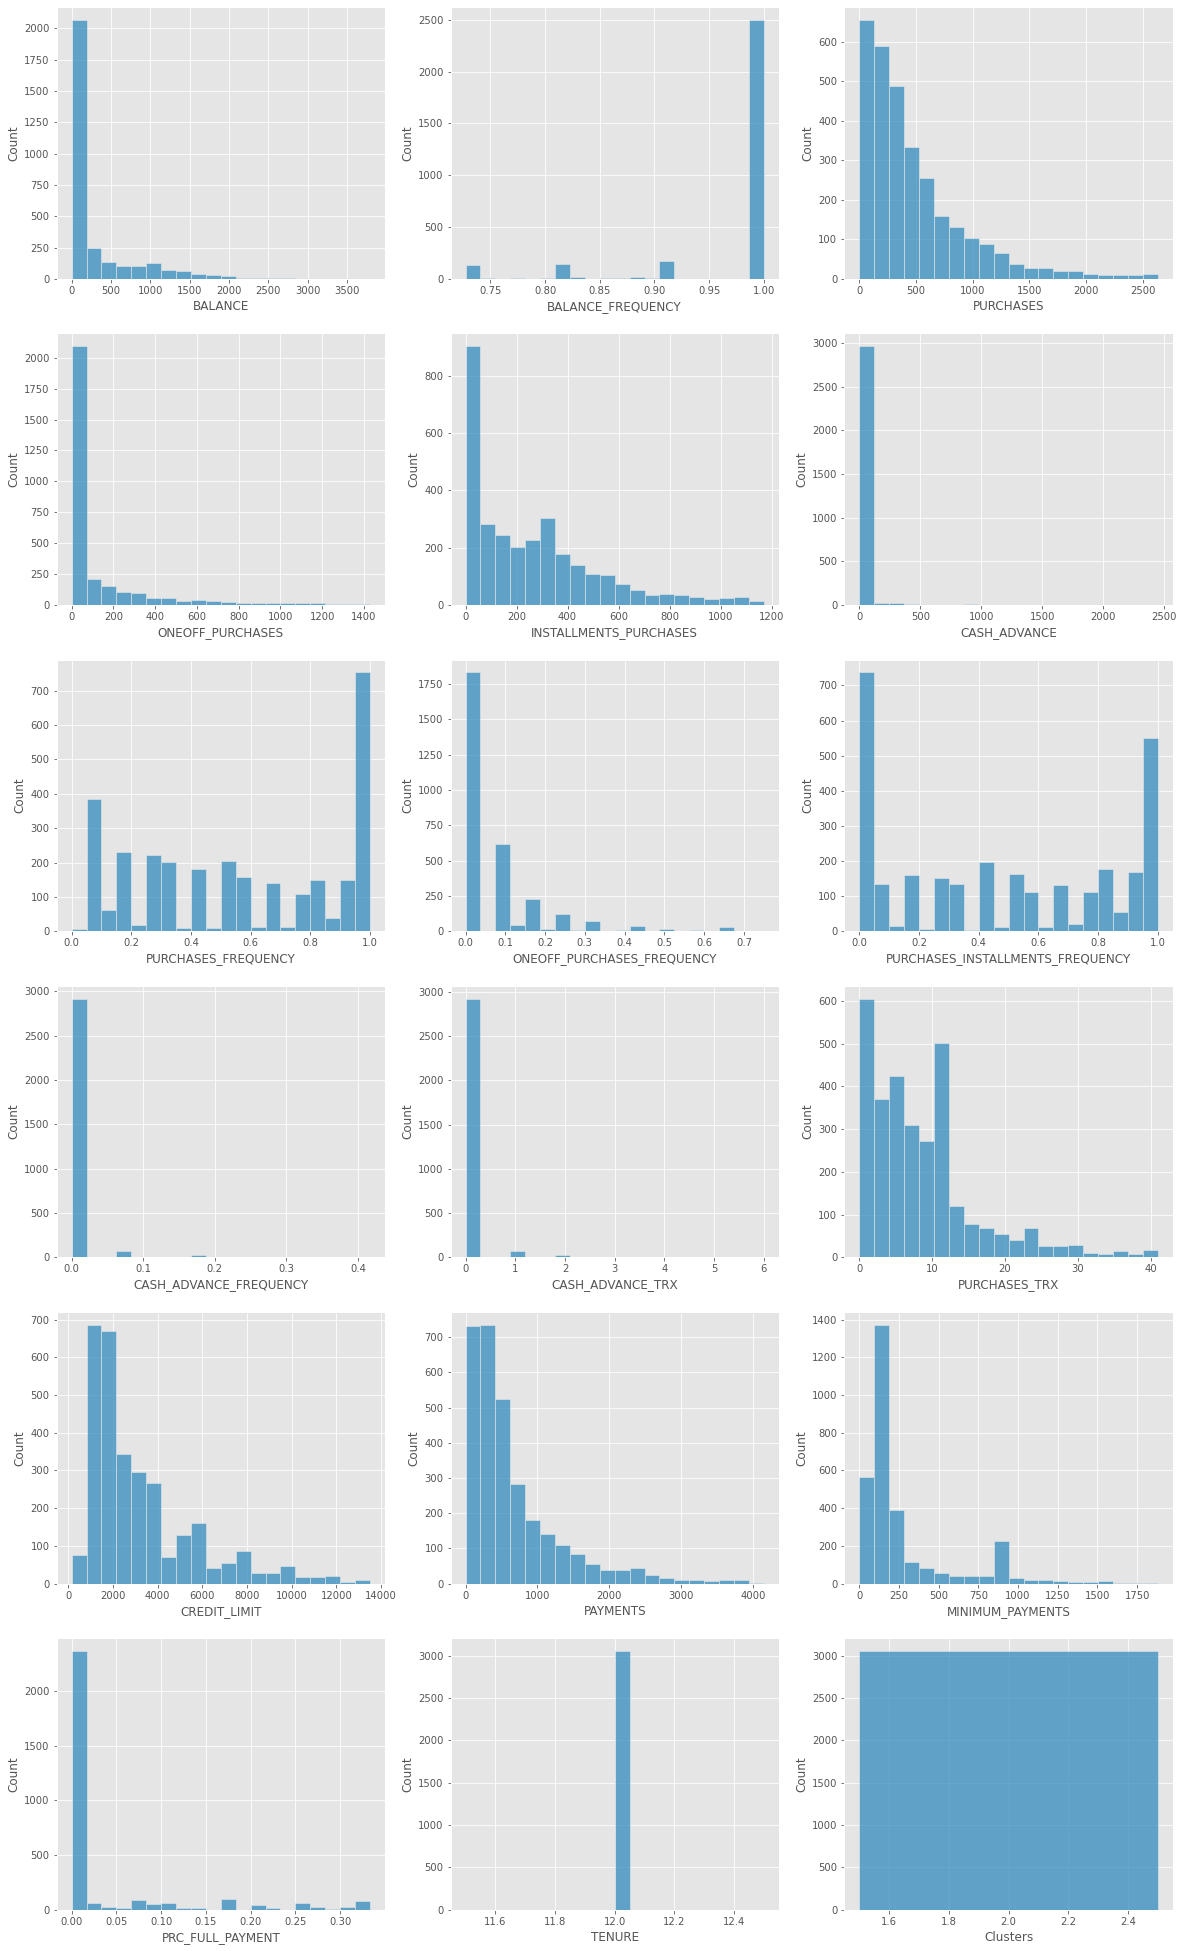

In [64]:
plt.figure(figsize=(20,35))

for i, col in enumerate(df.columns):
        ax = plt.subplot(6, 3, i+1)
        sns.histplot( x = col , ax=ax , bins=20 , data = df[df['Clusters'] == 2])
        plt.xlabel(col)
plt.show()

- Cluster 2 :

   - Customers with Above Medium Balance.

   - Doesn't Prefer Installment Purchases , But Prefer to Pay in advance.

   - Doesn't Purchase Frequently but when they do it's with Medium Payments and they have a Medium Credit Limit

# Hierarchical Clustering 

### Creating Dendrogram

- 1 : PCA

In [65]:
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(X_pca, method = 'complete')

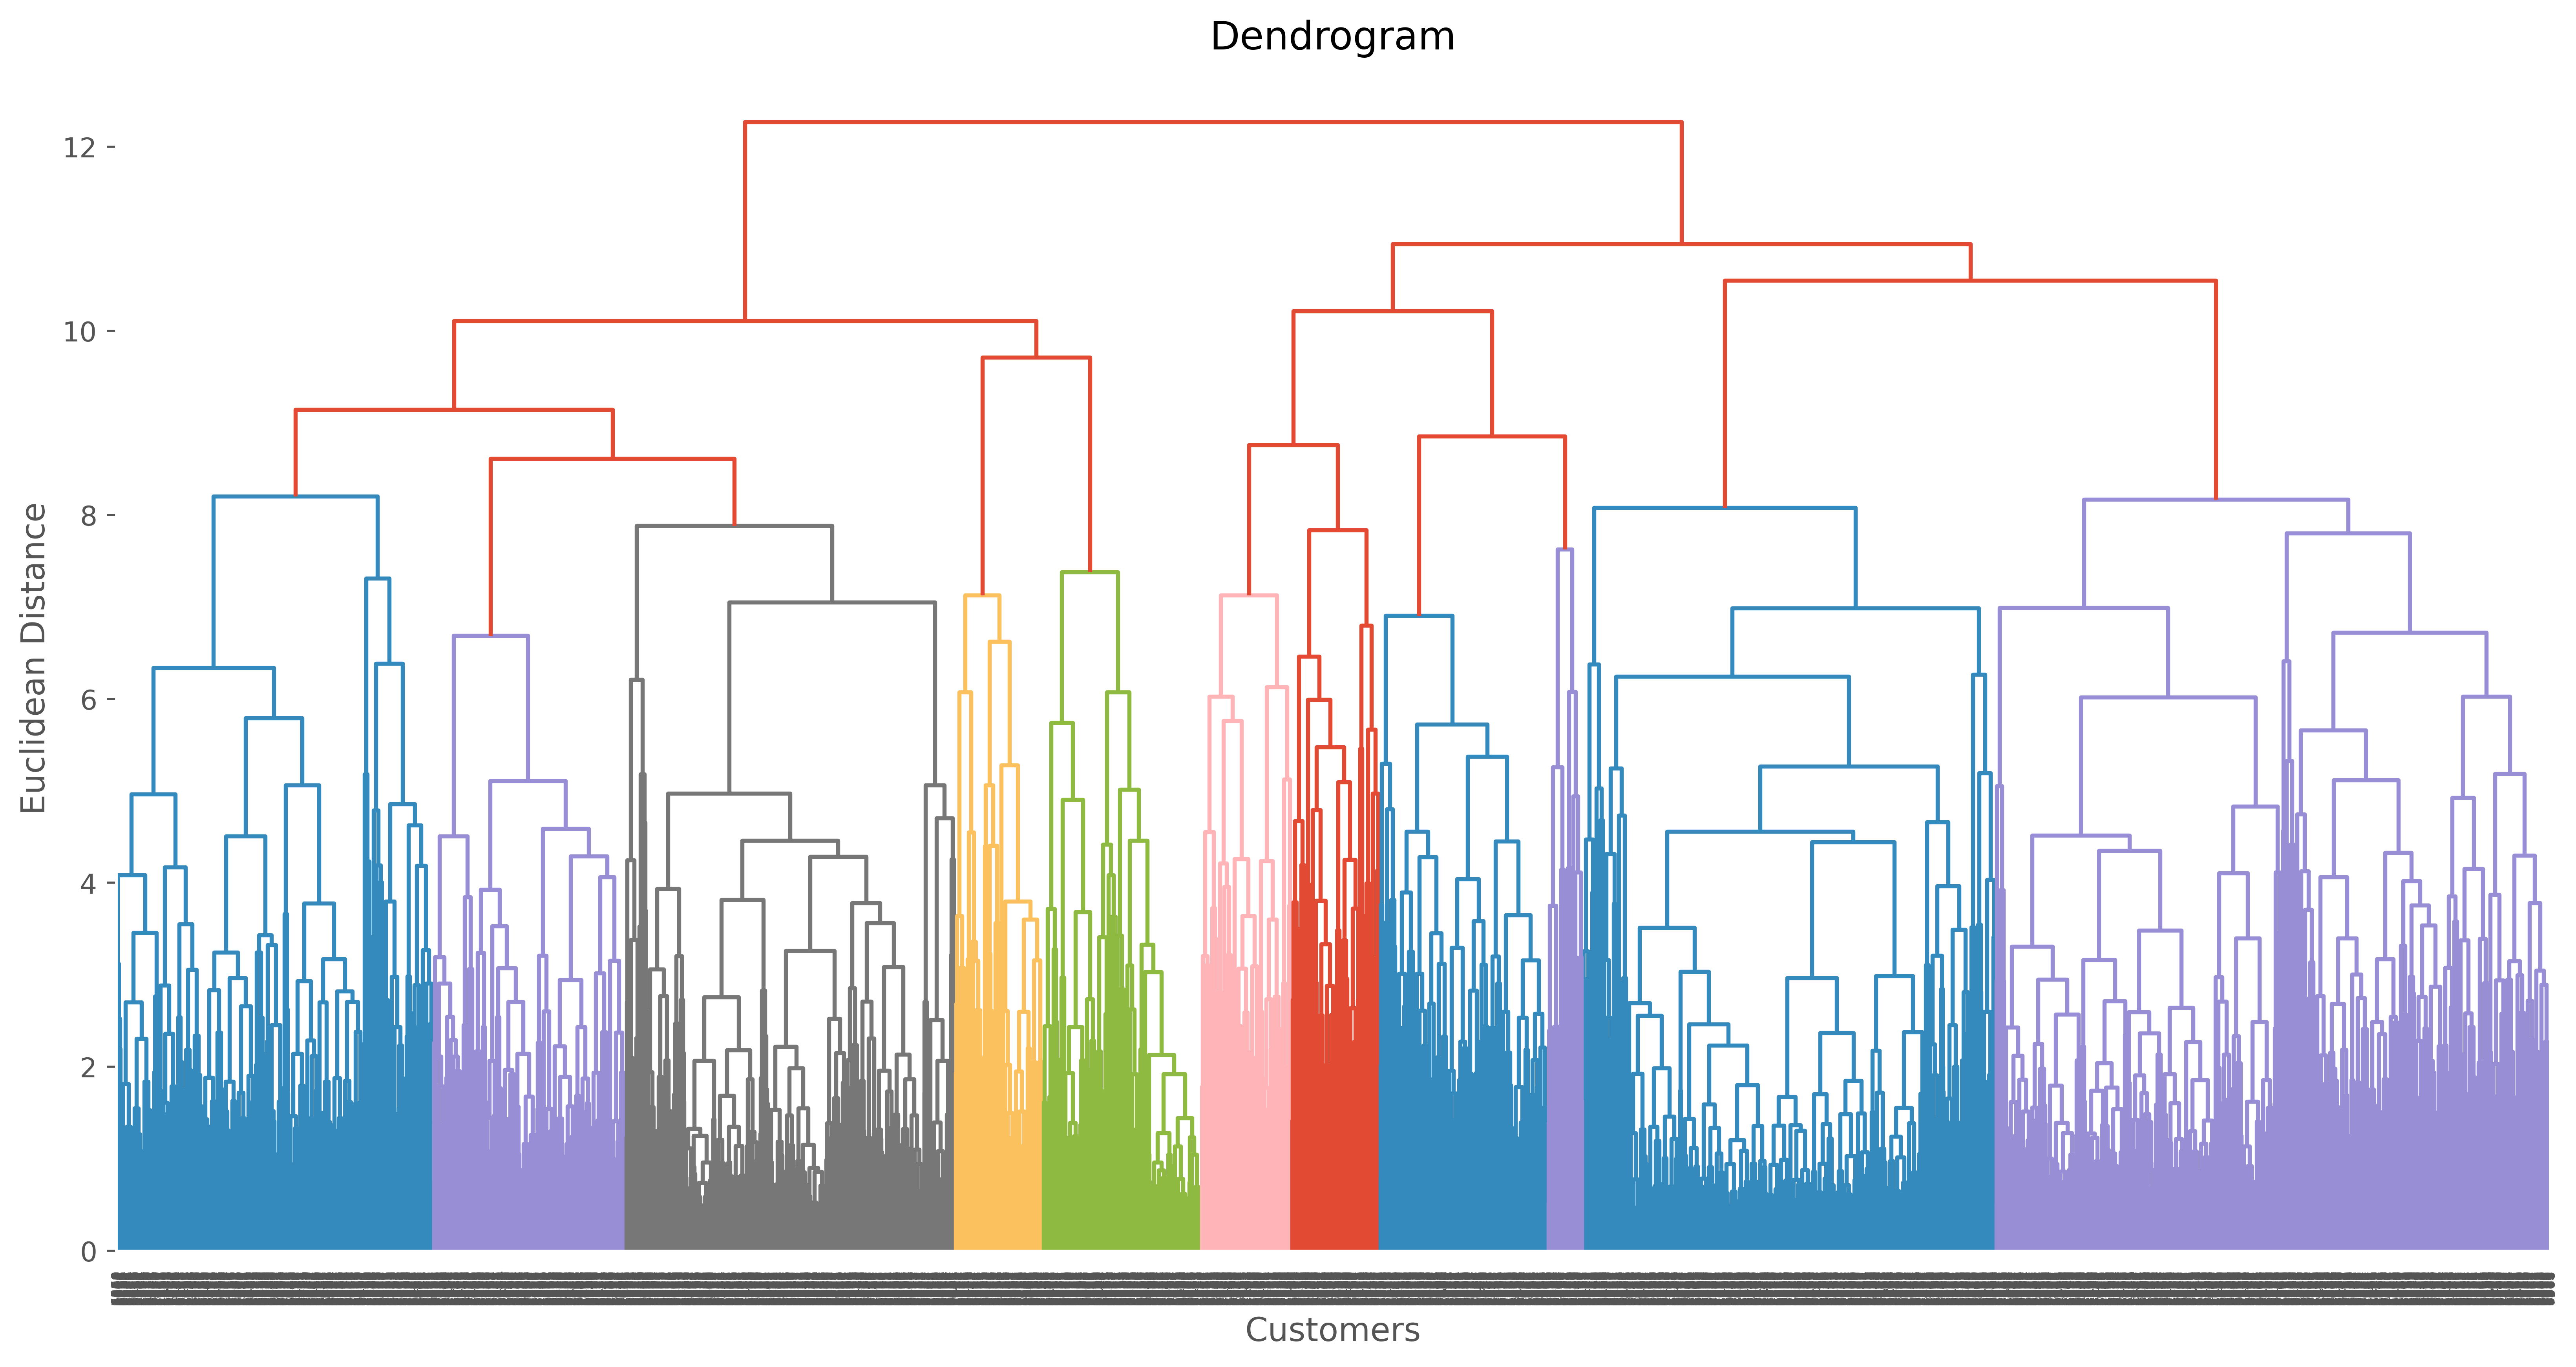

In [69]:
plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.savefig('Dendrogram.png', dpi = 2000)

In [70]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X_pca)
y_hc

array([1, 0, 1, ..., 2, 1, 1], dtype=int64)

- 2 : Scaled Data

In [71]:
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(df_scaled, method = 'complete')

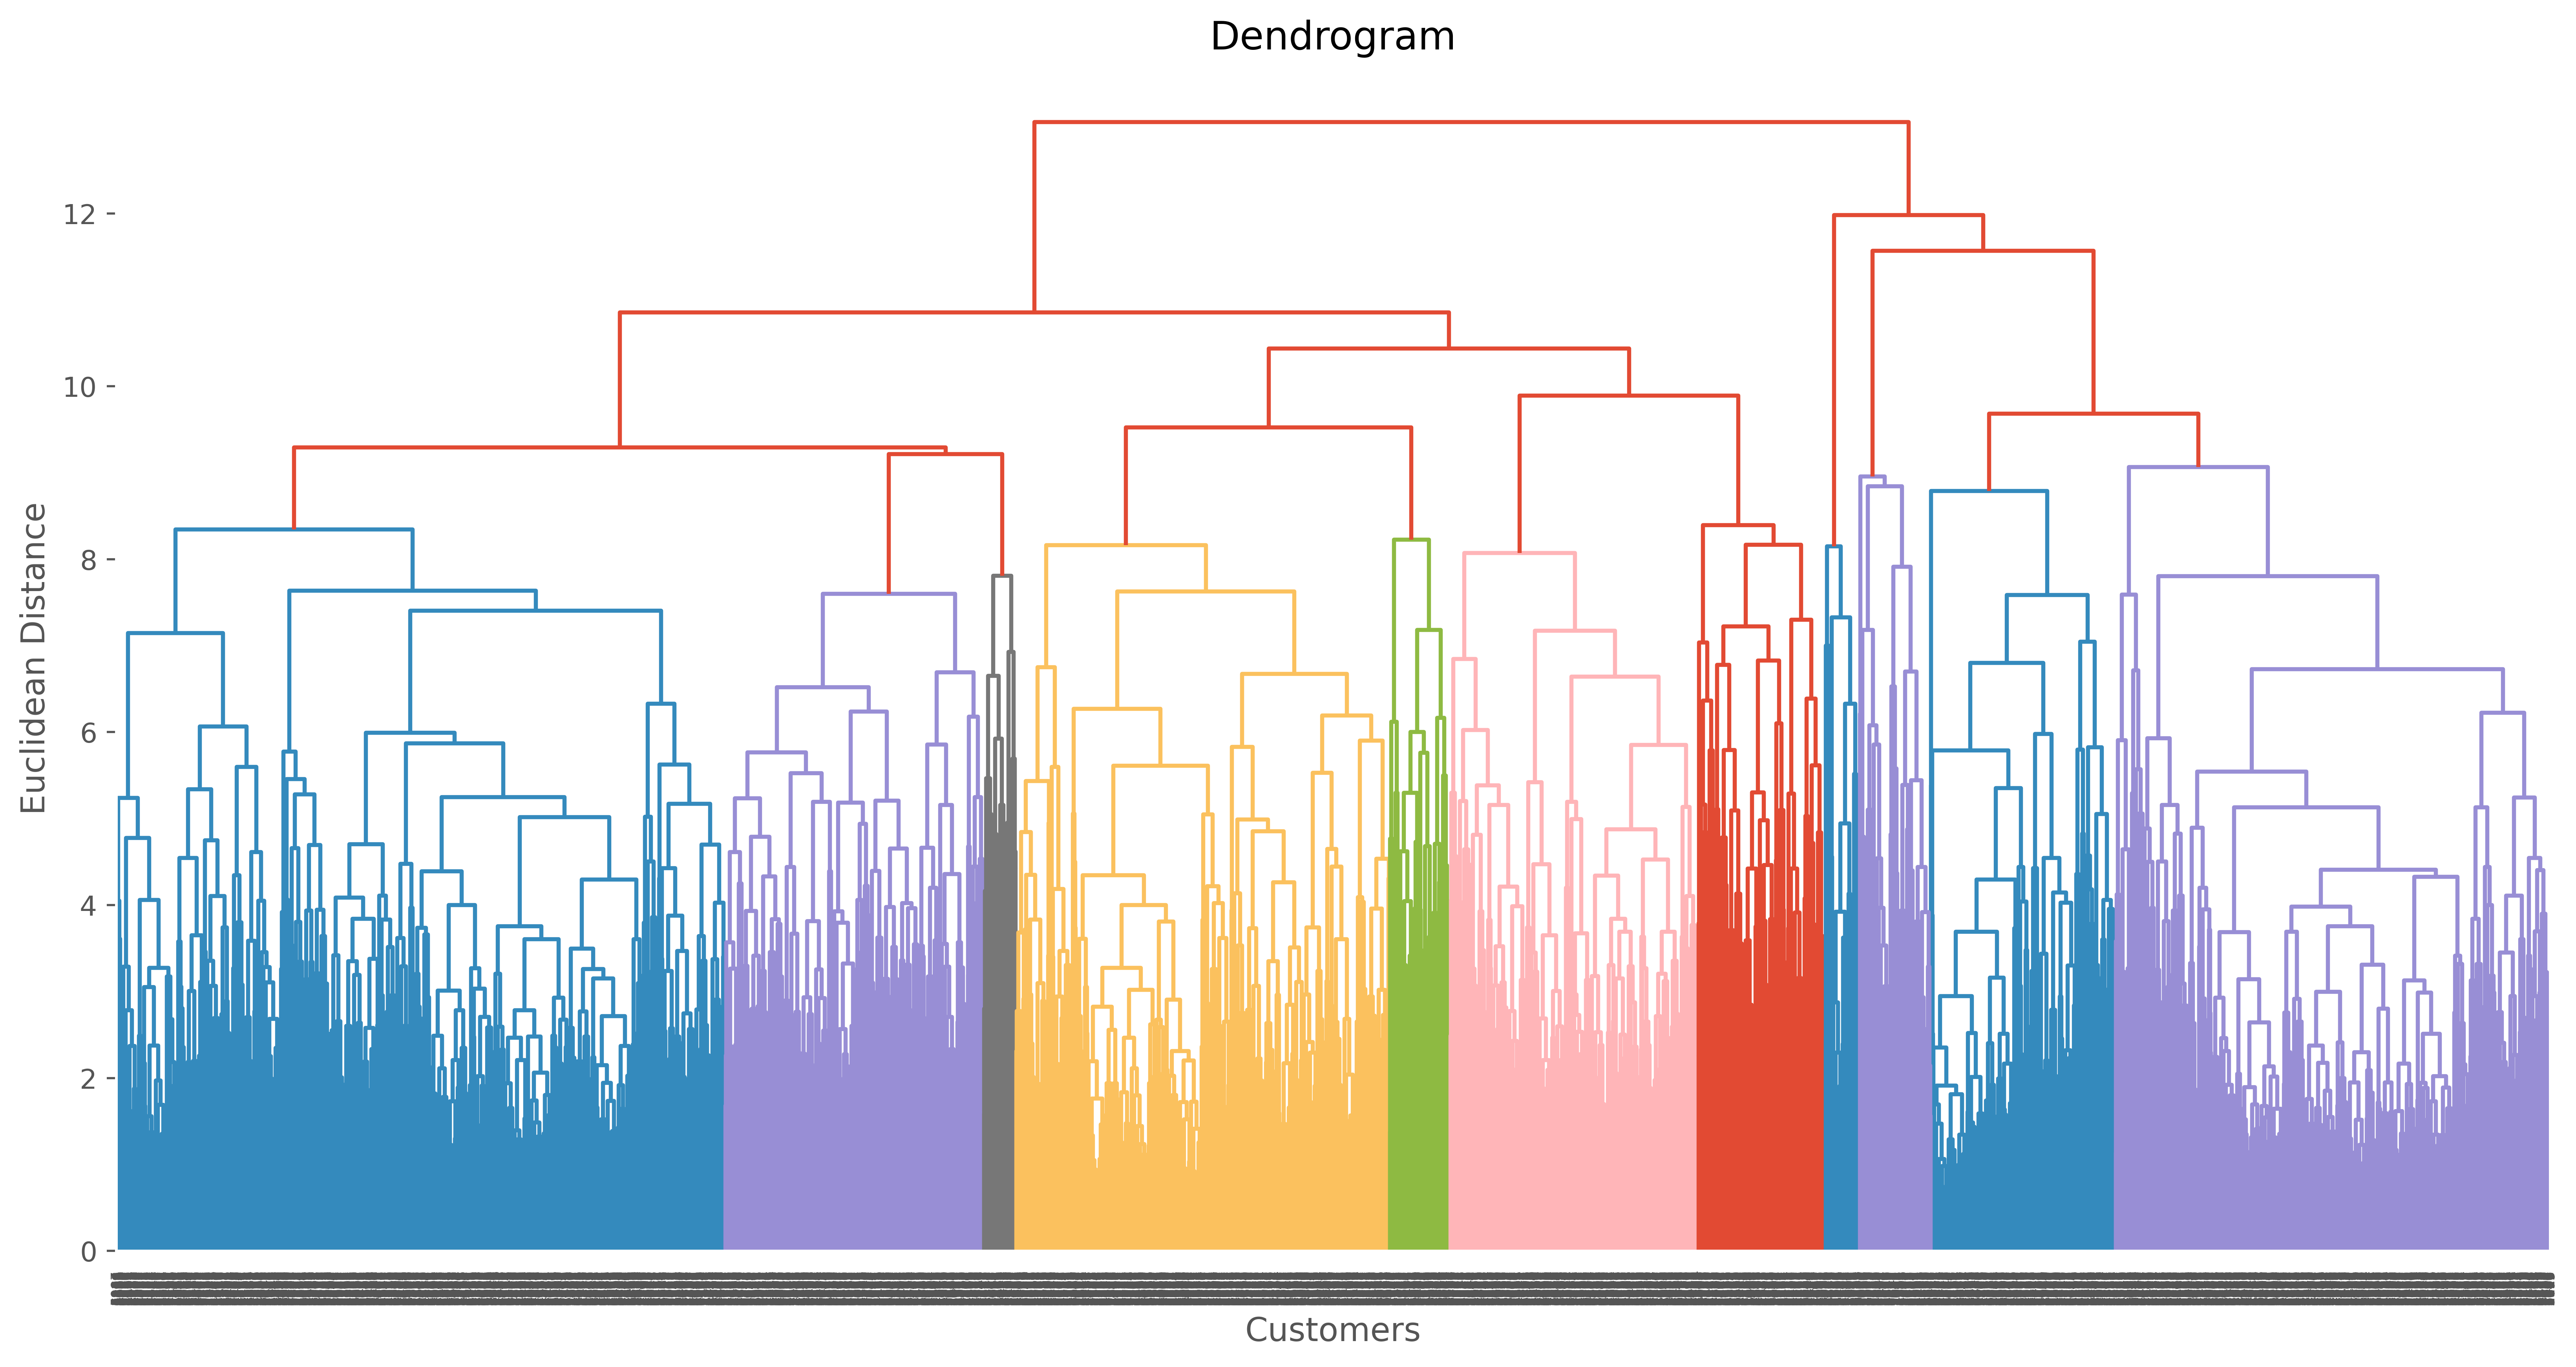

In [72]:
plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.savefig('Dendrogram_scaled.png', dpi = 2000)